# Surfactant systems data

## Header

### Imports

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.interpolate
import scipy.constants as C
import ase.data

import os

In [128]:
# for storing files in database
from fireworks.utilities.filepad import FilePad, LAUNCHPAD_LOC

### Global settings

In [3]:
%matplotlib inline

In [4]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (11,7) # the standard figure size

### Supportive functions & snippets

In [5]:
def df_crossjoin(df1, df2, **kwargs):
    """Creates row-wise cartesian product of two data frames"""
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1

    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    #res.index = pd.MultiIndex.from_product((df1.index, df2.index))

    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)

    return res

In [6]:
def subplotPosition(rows,cols):
    """generator for subplot positions"""
    for p in range(0,rows*cols):
        yield rows*100+cols*10+p+1

def addSubplot(x, y,
               title=None, xlabel=None, ylabel=None, legend=None, fmtstr=None,
               fig=None, ax=None, pos=None, figsize=(8,5)):
    """facilitate matplotlib figure & subplot creation. only one data series per call."""
    
    if not pos:
        pos = 111
    if not fig and not ax:
        fig = plt.figure(figsize=figsize)
    elif not fig and ax:
        fig = ax.get_figure()
    if not ax:
        ax = fig.add_subplot(pos)
      
    if fmtstr and legend:
        ax.plot(x,y,fmtstr,label=legend)
    elif fmtstr:
        ax.plot(x,y,fmtstr)         
    elif legend:
        ax.plot(x,y,label=legend)
    else:
        ax.plot(x,y)
               
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
    if legend:
        ax.legend()
        
    return fig, ax

In [7]:
# constants

In [8]:
AU = C.value("atomic mass constant")

In [9]:
AU

1.66053904e-27

In [10]:
C.atomic_mass # kg

1.66053904e-27

In [11]:
# Using ase atomic data

In [12]:
ad = pd.DataFrame(data={"symbol": ase.data.chemical_symbols,
                                "name"  : ase.data.atomic_names,
                                "mass"  : ase.data.atomic_masses } ) # atomic data

In [13]:
str_DSm = {'C': 12, 'H': 25, 'S': 1, 'O': 4}
str_CTAp = {'C': 19, 'H': 42, 'N': 1}

In [14]:
M_Br = ad[ ad.symbol == "Br" ]['mass'].values[0] * C.gram # a bit too much

In [15]:
M_Na = ad[ ad.symbol == "Na" ]['mass'].values[0] * C.gram

In [16]:
M_DSm = 0
for sym, n in str_DSm.items():
    M_DSm += ad[ ad.symbol == sym ]['mass'].values[0] * n * C.gram

In [17]:
M_CTAp = 0
for sym, n in str_CTAp.items():
    M_CTAp += ad[ ad.symbol == sym ]['mass'].values[0] * n * C.gram

In [18]:
M_SDS_sum = M_DSm + M_Na
M_CTAB_sum = M_CTAp + M_Br

In [19]:
M_SDS  = 288.372 * C.gram # kg / mol, Na+ inclusively, 
M_CTAB = 364.45  * C.gram  # kg / mol, Br- inclusively, https://en.wikipedia.org/wiki/Cetrimonium_bromide

In [20]:
M_CTAp

0.28455199999999997

In [21]:
M_CTAB

0.36445

In [22]:
M_SDS_sum - M_SDS

5.769280000011978e-06

In [23]:
M_CTAB_sum - M_CTAB

6.0000000000060005e-06

In [24]:
def cMolar(massFraction, molarMassSolute, solventDensity=0.997):
    # default density: water at 298 K and 1013 hPa, [density] = kg dm^-3 = kg L^-3
    # cMolar_i = massFraction_i * rho / M_i
    # where M is the solute's i molar mass, 
    # and rho the solution's density ( ~ solvent's density at low concentrations)
    return massFraction*solventDensity / molarMassSolute # mol L^-3 = M

In [25]:
def cal2J(e):
    return e/C.calorie

In [26]:
def J2cal(e):
    return e/C.calorie

In [27]:
def sigma2R(sigma): # LJ parameter conversion:
    return 2.0**(1.0/6.0)*sigma

In [28]:
sigma2R(4.83)/2

2.7107458466671357

In [29]:
C.calorie

4.184

In [30]:
J2cal(0.21)

0.05019120458891013

### Properties, classifications, etc

#### Surfactant systems

In [31]:
solute = ["CTAB", "CTAC", "C14TAB", "C16TAOH", "DDAPS", "DeTATf", "LPPC", "SDS"]

In [32]:
solvent = ["H2O","PC"]

In [33]:
substrate = ["alumina","gold","graphite","mica","silica"]

In [34]:
crystal_plane = [100, 111, 110]

In [35]:
adaggregate_shapes = ["micellar", "hemimicellar", "cylindrical", "hemicylindrical", 
                     "monolayer", "bilayer"]

In [36]:
micellar_shapes = ["globular", "oblate", "rod-like"]

In [37]:
columns_surfactant_properties_df = [
                        "surfactant", 
                        "solvent",
                        "cmc_1st",
                        "cmc_2nd",
                        "krafft_temperature",
                        "reference_key",
                        "reference_comment"]

In [38]:
surfactant_properties_df = pd.DataFrame(columns=columns_surfactant_properties_df)

In [39]:
surfactant_properties_df.append( {
    "surfactant": "CTAB",
    "solvent": "water",
    "cmc_1st": 0.92e-3, # M
    "cmc_2nd": 0.27, # M
    "krafft_temperature": 298, # K
    "reference_key": "dasilva2018molecular",
    "reference_comment": "Da Silva, J. A., Dias, R. P., Da Hora, G. C. A., Soares, T. A., & Meneghetti, M. R. (2018). Molecular dynamics simulations of cetyltrimethylammonium bromide (CTAB) micelles and their interactions with a gold surface in aqueous solution. Journal of the Brazilian Chemical Society, 29(1), 191–199. https://doi.org/10.21577/0103-5053.20170130"
}, ignore_index=True)

,surfactant,solvent,cmc_1st,cmc_2nd,krafft_temperature,reference_key,reference_comment
0,CTAB,water,0.00092,0.27,298,dasilva2018molecular,"Da Silva, J. A., Dias, R. P., Da Hora, G. C. A..."


In [40]:
columns_reference_df = ["unique_key",
                        "category",
                        "surfactant", 
                        "ff", 
                        "ff_comment", 
                        "pbc", 
                        "production_time", 
                        "ensemble",
                        "solvent",
                        "solvent_model",
                        "reference_key",
                        "reference_comment"]

In [41]:
columns_charmm_specific = ['parameter_set',
                           'inner_lj_cutoff',
                           'outer_lj_cutoff',
                           'inner_coulomb_cutoff',
                           'outer_coulomb_cuttof',
                           'lj_switching']

In [42]:
columns_sds_specific = ['sds_model', 'sodium_model']

In [43]:
columns_ctab_specific = ['ctab_model','bromide_model']

In [44]:
columns_aggregate_properties = [
    'rgyr', 
    'rdf_COM_head', 
    'rdf_COM_tail', 
    'rdf_COM_solvent', 
    'rdf_head_ion', # ion here means counter ion, i.e. Na+ or Br-
    'rdf_head_head', # vague
    'rdf_tail_tail',
    'rdf_ion_ion',
    'rdf_solvent_solvent',
    'aggregation_number',
]

In [45]:
columns_experimental = [ "surfactant", "solvent", "cmc1st", "cmc2nd", 
                         "T_Krafft", "reference_key", "reference_comment"]
experimental_template = pd.Series(index=columns_experimental)

#### Simulation

In [46]:
columns_simulation_properties = ["surfactant", "sf_preassembly", 
                                 "sf_nmolecules", "sf_natoms",
                                 "sf_concentration", # M
                                 "substrate", "sb_crystal_plane", 
                                 "sb_unit_cell", "sb_multiples", "sb_natoms",
                                 "counterion", "ci_initial_placement", 
                                 "ci_nmolecules",
                                 "solvent", "sv_density", "sv_preassembly", 
                                 "sv_nmolecules", "sv_natoms",
                                 "pbc", # 111
                                 "box", # Ang     
                                 "temperature", # applies to NVT, NPT
                                 "pressure", # applies to all NPT
                                 # MINIMIZATION ?
                                 "minimization_steps",
                                 # NVT EQUILIBRATION
                                 "nvt_equilibration_steps",
                                 # NPT EQUILIBRATION
                                 "npt_equilibration_steps",
                                 # NPT PRODUCTION
                                 "npt_production_steps",
                                 # MORE TO FOLLOW
                                 
                                 "code",
                                 #"ff", 
                                 #"ff_comment",
                                
                                 "comments"]

In [47]:
columns_simulation_performance = ["code",
                                  "steps",
                                  "natoms",
                                  "machine",
                                  "nodes",
                                  "ppn",
                                  "mpi_tasks",
                                  "omp_threads",
                                  "cpu_time",
                                  "runtime",
                                  "ns_per_day" 
                                 ]

## Previous work on surfactant aggregation

Growing collection of standardized micellizationd and adsorption MD setups and results.


Starting point:

Indelicato, S., Bongiorno, D., Calabrese, V., Perricone, U., Almerico, A. M., Ceraulo, L., … Tutone, M. (2017). Micelles, Rods, Liposomes, and Other Supramolecular Surfactant Aggregates: Computational Approaches. Interdisciplinary Sciences: Computational Life Sciences. https://doi.org/10.1007/s12539-017-0234-7

### Overview

#### SDS experimantal

* at interface:
  * on gold:
      * Schniepp, H.C., Shum, H.C., Saville, D.A., Aksay, I.A., 2008. Orientational order of molecular assemblies on rough surfaces. J. Phys. Chem. C 112, 14902–14906.
      * D.P. Benton, B.D. Sparks, Trans. Faraday Soc. 62 (1966) 3244–3252.


#### CTAB experimental
To record:

* at interface
  * __steel__: Xie, G., Luo, J., Liu, S., Guo, D., 2011. Electrical potential modulation of dynamic film properties of aqueous surfactant solutions through a nanogap. J. Appl. Phys. 109, 24309. 
  * __mica__: Lamont, R.E., Ducker, W.A., 1997. Surface-Induced Transformations for Surfactant Aggregates. 
    J. Am. Chem. Soc 120, 7602–7607. (on mica)
  * __gold__: 
    * Shi, L., Ghezzi, M., Caminati, G., Nostro, P. Lo, Grady, B.P., Striolo, A., 2009. 
      Adsorption isotherms of aqueous C12e6and cetyltrimethylammonium bromide surfactants on solid surfaces 
      in the presence of low molecular weight coadsorbents. Langmuir 25, 5536–5544.
    * Gutig, C., Grady, B.P., Striolo, A., 2008. 
      Experimental studies on the adsorption of two surfactants on solid-aqueous interfaces: 
      Adsorption isotherms and kinetics. Langmuir 24, 4806–4816.
    * Kawasaki, H., Nishimura, K., Arakawa, R., 2007. 
      Influence of the counterions of cetyltrimetylammonium salts on the surfactant adsorption 
      onto gold surfaces and the formation of gold nanoparticles. J. Phys. Chem. C 111, 2683–2690.
    * Knag, M., Sjöblom, J., Gulbrandsen, E., 2005. 
      The effect of straight chain alcohols and ethylene glycol on the adsorption of CTAB on gold. 
      J. Dispers. Sci. Technol. 26, 207–215.  
      QCM, no AFM
    * Byloos, M., Al-Maznai, H., Morin, M., 2001. 
      Phase transitions of alkanethiol self-assembled monolayers at an electrified gold surface. 
      J. Phys. Chem. B 105, 5900–5905.  
      CV, no AFM images
    * **Jaschke, M., Butt, H.-J., Gaub, H.E., Manne, S., 1997.**
      Surfactant Aggregates at a Metal Surface. Langmuir 13, 1381–1384.
  
* ~~Ducker et al., ACS Pub., 1996~~ (although not in focus, has some bits on CTAB (on mica))
* Sepulveda et al., J. Phys. Chem., 1985 (partially evaulated)
* **Paredes et al. J. Phys. Chem., 1984**: CTAB and other CTAX, cmc with different additives
* Mukerjee, Mysels, Nat. Std. Ref. Dat. Sys., 1971 (CMC database)
* ~~Reiss-Husson et al., J Phys. Chem., 1964~~ (more interesting data still in papar, i.e. CACl)





#### SDS MD

* in bulk
    * Farafonov et al., ACS Pub., 2017 
    * Kawada, S., Komori, M., Fujimoto, K., Yoshii, N., Okazaki, S., 2016. Molecular dynamics study of the formation mechanisms of ionic SDS and nonionic C12E8micelles and n-dodecane droplets. Chem. Phys. Lett. 646, 36–40. CHARMM36
    * **Volkov, N.A., Tuzov, N. V., Shchekin, A.K., 2016. Molecular dynamics study of salt influence on transport and structural properties of SDS micellar solutions. Fluid Phase Equilib. 424, 114–121.**
      CHARMM36
    * __Tang et al., ACS Pub., 2014__
    * Yan, H., Cui, P., Liu, C.-B., Yuan, S.-L., 2012. Molecular Dynamics Simulation of Pyrene Solubilized in a Sodium Dodecyl Sulfate Micelle. Langmuir 28, 4931–4938.
    * Palazzesi et al., Royal Society of Chemistry, 2011
    * Shang et al., ACS Pub., 2008
    * Sammalkorpi et al., ACS Pub., 2007:
      * Sammalkorpi, M., Karttunen, M., Haataja, M., 2007. Structural properties of ionic detergent aggregates: a large-scale molecular dynamics study of sodium dodecyl sulfate. J. Phys. Chem. B 111, 11722–33.
    * Yoshii et al., J. Chem. Phys. / Chem. Phys. Let. / Cond. Matt. Phys.,	2006 and 2007
      * Yoshii, N., Okazaki, S., 2006. A molecular dynamics study of surface structure of spherical SDS micelles. Chem. Phys. Lett. 426, 66–70.
      * Yoshii, N., Iwahashi, K., Okazaki, S., 2006. A molecular dynamics study of free energy of micelle formation for sodium dodecyl sulfate in water and its size distribution. J. Chem. Phys. 124, 184901.
      * Yoshii, N., Okazaki, S., 2006. A molecular dynamics study of structural stability of spherical SDS micelle as a function of its size. Chem. Phys. Lett. 425, 58–61.
      * Yoshii, Okazaki, 2007. A molecular dynamics study of structure and dynamics of surfactant molecules in SDS spherical micelle. Condens. Matter Phys. 10, 573.
    * Bruce et al., 2002
      * Bruce, C.D., Berkowitz, M.L., Perera, L., Forbes, M.D.E., 2002. Molecular dynamics simulation of sodium dodecyl sulfate micelle in water: Micellar structural characteristics and counterion distribution. J. Phys. Chem. B 106, 3788–3793.
      * Bruce, C.D., Senapati, S., Berkowitz, M.L., Perera, L., Forbes, M.D.E., 2002. Molecular Dynamics Simulations of Sodium Dodecyl Sulfate Micelle in Water: The Behavior of Water. J. Phys. Chem. B 106, 10902–10907.
    * Schweighofer et al., ACS Pub., 1997
    * ~~MacKerell, J. Phys. Chem., 1995~~
    * **Shelley et al., Int. J. of Quantum Chemistry, 1990** (initial SDS parametrization)
* at interface 
    * Peredo-Mancilla, D., Dominguez, H., 2016. Adsorption of phenol molecules by sodium dodecyl sulfate (SDS) surfactants deposited on solid surfaces: A computer simulation study. J. Mol. Graph. Model. 65, 108–112.
    * Núñez-Rojas, E., Domínguez, H., 2011. Computational studies on the behavior of Sodium Dodecyl Sulfate (SDS) at TiO2(rutile)/water interfaces. J. Colloid Interface Sci. 364, 417–427.
    * Domínguez, H., 2010. Structure of the SDS/1-dodecanol surfactant mixture on a graphite surface: A computer simulation study. J. Colloid Interface Sci. 345, 293–301.
    * Dominguez, H., Berkowitz, M.L., 2000. Computer simulations of sodium dodecyl sulfate at liquid/liquid and liquid/vapor interfaces. J. Phys. Chem. B 104, 5302–5308.
    * **Schweighofer, K.J., Essmann, U., Berkowitz, M., 1997. Simulation of Sodium Dodecyl Sulfate at the Water−Vapor and Water−Carbon Tetrachloride Interfaces at Low Surface Coverage. J. Phys. Chem. B 101, 3793–3799.** (first interfacial MD of SDS)

#### CTAB MD

* at interface
    * **Da Silve et al., Journal of the Brazilian Chemical Society, 2018**
    * **Meena et al., PCCM 2016, Langmuir 2013**
    * **Bandyopadhyay, S., Shelley, J.C., Tarek, M., Moore, P.B., Klein, M.L., 1998. Surfactant Aggregation at a Hydrophobic Surface. J. Phys. Chem. B 102, 6318–6322.** (qualitatively interesting)

* in bulk
    * Liu et al., J. Phys. Chem. B, 2014
    * Mills et al., J. Phys. Chem. B, 2014
    * Chen et al., PCCP, 2013
    * ~~Storm et al., Langmuir, 2013~~
    * Feng et al., Soft Matter, 2011
    * Catá et al., Soft Matter, 2011
    * Wang et al., Biochemistry, 2009
    * Stephenson et al., Langmuir,  2006

  

### At interface, experimental

#### Benton 1966

In [130]:
!cat 'data/references/benton1966adsorption/fig1_SDS.csv' | head

# D.P. Benton, B.D. Sparks, Trans. Faraday Soc. 62 (1966) 3244–3252.
# SDS adsorption on gold powder in solution
# SDS cmc ~ 8.11 mM / l
# adsorption density (10^13 molecules / cm^2), bulk concentration (cmc)
0.10053138445133669, 4.013036631872794
0.14961949921148449, 5.105208807520157
0.2867001556956442, 5.470517904999092
0.31400741222266904, 6.342696917793063
0.33240748449095436, 5.693628523300326
0.4434455794422707, 6.489854985183239


In [131]:
exp_benton1966_fig1_sds_data_raw = pd.read_csv(
    'data/references/benton1966adsorption/fig1_SDS.csv',
    delimiter=',',comment='#',header=None,names=["c","GammaN"])
# c      : concentration (in fractions of cmc = 8.1 mM)
# GammaN : surface number density (in 10^13 molecules / cm^2)

In [157]:
exp_benton1966_fig1_sds_fit_data_raw = pd.read_csv(
    'data/references/benton1966adsorption/fig1_SDS_fit.csv',
    delimiter=',',comment='#',header=None,names=["c","GammaN"])
# c      : concentration (in fractions of cmc = 8.1 mM)
# GammaN : surface number density (in 10^13 molecules / cm^2)

In [132]:
exp_benton1966_sds_cmc = 8.11 # mM

In [133]:
C.centi

0.01

In [428]:
exp_benton1966_fig1_sds_data = pd.concat([    
    exp_benton1966_fig1_sds_data_raw[["c"]] * exp_benton1966_sds_cmc * C.milli, # mM --> M
    exp_benton1966_fig1_sds_data_raw[["GammaN"]] * 1e13 # molecules cm^-2 \
        / C.Avogadro # molecules cm^-2 --> moles cm^-2 \
        / C.centi**2 #  moles cm^-2 --> moles m^-2
    ], axis=1)

In [429]:
exp_benton1966_fig1_sds_data.columns = ['c','GammaC']

In [430]:
exp_benton1966_fig1_sds_fit_data = pd.concat([    
    exp_benton1966_fig1_sds_fit_data_raw[["c"]] * exp_benton1966_sds_cmc * C.milli,
    exp_benton1966_fig1_sds_fit_data_raw[["GammaN"]] * 1e13 # molecules cm^-2 \
        / C.Avogadro # molecules cm^-2 --> moles cm^-2 \
        / C.centi**2 #  moles cm^-2 --> moles m^-2
    ], axis=1)

In [431]:
exp_benton1966_fig1_sds_fit_data.columns = ['c','GammaC']

In [432]:
exp_benton1966_fig1_sds_data[["GammaN"]] = exp_benton1966_fig1_sds_data[["GammaC"]] * C.Avogadro
exp_benton1966_fig1_sds_fit_data[["GammaN"]] = exp_benton1966_fig1_sds_fit_data[["GammaC"]] * C.Avogadro

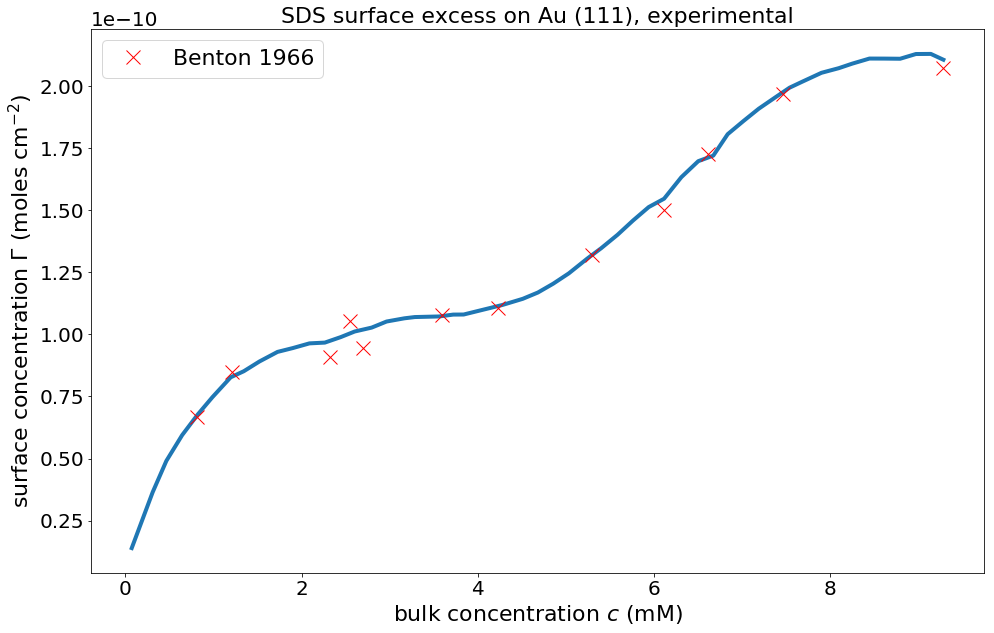

In [434]:
plt.plot(exp_benton1966_fig1_sds_fit_data[["c"]] / C.milli,
             exp_benton1966_fig1_sds_fit_data[["GammaC"]]*C.centi**2)
plt.plot(exp_benton1966_fig1_sds_data[["c"]] / C.milli, 
             exp_benton1966_fig1_sds_data[["GammaC"]]*C.centi**2,
             'ro', label = "Benton 1966", marker='x')
plt.xlabel(r'bulk concentration $c \ (\mathrm{mM})$')
plt.ylabel(r'surface concentration $\Gamma \ (\mathrm{moles \ cm^{-2}})$')
plt.title("SDS surface excess on Au (111), experimental")
plt.legend()

#### Da Silva 2018

In [48]:
exp_dasilva2018molecular = experimental_template.copy()

In [49]:
exp_dasilva2018molecular.surfactant = "CTAB"
exp_dasilva2018molecular.solvent    = "H2O"
exp_dasilva2018molecular.T_Krafft   = 298 # K
exp_dasilva2018molecular.cmc1st     = 0.92e-3 # M = mol / l
exp_dasilva2018molecular.cmc2nd     = 0.27 # M
exp_dasilva2018molecular.reference_key     = "dasilva2018molecular"
exp_dasilva2018molecular.reference_comment = "1st cmd:" \
    "  Goyal, P. S.; Dasannacharya, B. A.; Kelkar, V. K.; Manohar, C.;" \
    "  Rao, S.; Valaulikar, B. S.; Phys. B (Amsterdam, Neth.) 1991," \
    "  174, 196. " \
    "2nd cmc:" \
    "  Ekwall, P.; Mandell, L.; Solyom, P.; J. Colloid Interface Sci."\
    "  1971, 35, 519. " \
    "R_Krafft:" \
    "  Vautier-Giongo, C.; Bales, B. L.; J. Phys. Chem. B 2003, 107," \
    "  5398."

In [50]:
# no structure
exp_gutig2008experimental = {
    "surfactant":           ["CTAB", "C12E6"],
    "solvent":              "H2O",
    "substrate":            ["AU", "silica"],
    "techniques":           "QCM-D",
    "crytal_plane":         111,
    "reference_key":        "byloos2001phase",
    "comment":              "phase transition with temperature increase"}

In [51]:
# QCM measurements, valuable
exp_kawasaki2007influence = {
    "surfactant":           ["CTAB", "CTAX"],
    "solvent":              "H2O",
    "substrate":            ["AU"],
    "counterion":           ["BR", "CL", "NO3", "F", "OH", "SO4"],
    "techniques":           ["QCM","AFM"],
    "crytal_plane":         111,
    "c_adsorption_onset":   0.003e-3, # M, 0.003 mM
    "shape":                { 0.03e-3: "<, monolayer"}, # c, [c] = M
    "adsorption_mass":      {  0.03e-3: 70 * 1e-12 * 100**2,
                              10.0e-3: 203 * 1e-12 * 100**2}, # c -> m, [m] = kg m^-2 = 1e-8 ng cm^-2
    "molecular_area":       { 0.03e-3: 85 * 1e-20}, # 85 Ang**2 per molecule 
    "reference_key":        "kawasaki2007influence",
    "comment":              "CTAB: 3 regions "
                            "region 1: c < 0.003mM: adsorption due to headgroup-surface electrostatic forces, monolayer."
                            "region 2: 0.003mM < c < 1 mM: bilayer bildup. "
                            "region 3: 1mM < c."
                            "AFM force curves: "
                            "region 1: In water, the force curve is purely attractive below a separation of about 5 nm. "
                            "At a low surfactant concentration of 0.01 mM (region I), the attractive interaction "
                            "force increases and becomes more long range (<10 nm). This long-range attractive force can be attributed "
                            "to the hydrophobic monolayer with the alkyl-hydrocarbon chains of surfactants facing the "
                            "solution phase suggesting that region I is in the monolayer state. Further, as the "
                            "surfactant concentration in- creases to 0.07 mM (region II), the long-range attractive "
                            "force decreases. At 0.5 mM (region II), a weak repulsive force appears at a large "
                            "separation of about 25 nm due to the buildup of the bilayer with a cationic headgroup "
                            "facing the aqueous solutions. At the concentration of 3 mM above the cmc (region III), "
                            "an exponential long-range repulsive force and a short-range repulsive force appear at large "
                            "and small separations, respec- tively. The long-range repulsive force originates from the "
                            "electrical double-layer repulsion between the bilayer-type ag- gregates on gold. "
                            "The adsorption isotherm and force curves reveal that the progressive buildup of "
                            "the bilayer-type aggregates ofC16TABr occurs on the gold surface. It should be noted "
                            "that the morphologies ofbilayer-type aggregates (i.e., full-cylindrical aggregates or "
                            "complete bilayer surface aggregates) ofC16TABr are not clear by only QCM and AFM "
                            "force curves."}

#### Chen 2009, SDS

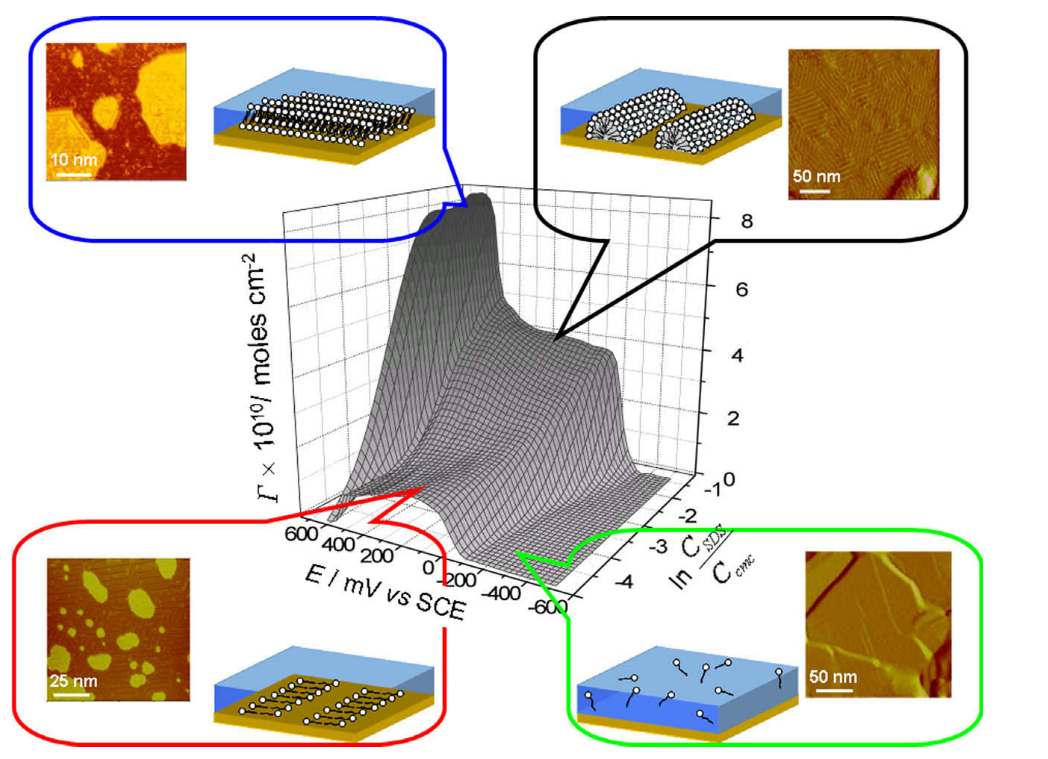

Fig. 11 SDS in 0.05 M KClO4 on Au(111)

In [52]:
exp_chen2009potential = {
    "surfactant":           ["SDS"],
    "solvent":              "H2O",
    "substrate":            ["AU"],
    "counterion":           ["NA"],
    "bg_electrolyte":       ["KClO4"],
    "techniques":           ["QCM","AFM"],
    "crytal_plane":         111 }
# TO BE FILLED OUT
#     "c_adsorption_onset":   0.003e-3, # M, 0.003 mM
#     "shape":                { 0.03e-3: "<, monolayer"}, # c, [c] = M
#     "adsorption_mass":      {  0.03e-3: 70 * 1e-12 * 100**2,
#                               10.0e-3: 203 * 1e-12 * 100**2}, # c -> m, [m] = kg m^-2 = 1e-8 ng cm^-2
#     "molecular_area":       { 0.03e-3: 85 * 1e-20}, # 85 Ang**2 per molecule 
#     "reference_key":        "kawasaki2007influence",
#     "comment":              "CTAB: 3 regions "
#                             "region 1: c < 0.003mM: adsorption due to headgroup-surface electrostatic forces, monolayer."
#                             "region 2: 0.003mM < c < 1 mM: bilayer bildup. "
#                             "region 3: 1mM < c."
#                             "AFM force curves: "
#                             "region 1: In water, the force curve is purely attractive below a separation of about 5 nm. "
#                             "At a low surfactant concentration of 0.01 mM (region I), the attractive interaction "
#                             "force increases and becomes more long range (<10 nm). This long-range attractive force can be attributed "
#                             "to the hydrophobic monolayer with the alkyl-hydrocarbon chains of surfactants facing the "
#                             "solution phase suggesting that region I is in the monolayer state. Further, as the "
#                             "surfactant concentration in- creases to 0.07 mM (region II), the long-range attractive "
#                             "force decreases. At 0.5 mM (region II), a weak repulsive force appears at a large "
#                             "separation of about 25 nm due to the buildup of the bilayer with a cationic headgroup "
#                             "facing the aqueous solutions. At the concentration of 3 mM above the cmc (region III), "
#                             "an exponential long-range repulsive force and a short-range repulsive force appear at large "
#                             "and small separations, respec- tively. The long-range repulsive force originates from the "
#                             "electrical double-layer repulsion between the bilayer-type ag- gregates on gold. "
#                             "The adsorption isotherm and force curves reveal that the progressive buildup of "
#                             "the bilayer-type aggregates ofC16TABr occurs on the gold surface. It should be noted "
#                             "that the morphologies ofbilayer-type aggregates (i.e., full-cylindrical aggregates or "
#                             "complete bilayer surface aggregates) ofC16TABr are not clear by only QCM and AFM "
#                             "force curves."}

In [54]:
c_CMC_SDS_in_50_mM_KClO4 = 0.54 * C.milli # M

In [55]:
exp_chen2009_fig4a_c_SDS = 0.6 * c_CMC_SDS_in_50_mM_KClO4

In [56]:
exp_chen2009_fig4a_c_SDS

0.000324

##### Figure 4 a

In [166]:
exp_chen2009_fig4a_data_raw = pd.read_csv('data/references/chen2009potential_fig4a.csv',
            delimiter=',',comment='#',header=None,names=["E","GammaC"])
# E      : electrode potential / V (vs. Ag/agCl)
# GammaC : surface excess / moles cm^-2

In [167]:
exp_chen2009_fig4a_data = pd.concat([    
    exp_chen2009_fig4a_data_raw[["E"]],
    exp_chen2009_fig4a_data_raw[["GammaC"]] / 1e10 / C.centi**2 #  moles cm^-2 --> moles m^-2
    ], axis=1)

In [168]:
exp_chen2009_fig4a_data.loc[exp_chen2009_fig4a_data["GammaC"] < 0.0, "GammaC"] = 0 

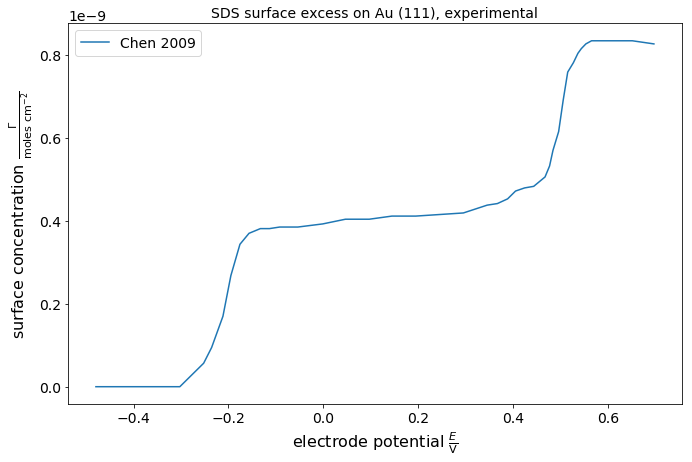

In [169]:
plt.plot(exp_chen2009_fig4a_data[["E"]],
             exp_chen2009_fig4a_data[["GammaC"]]*C.centi**2,
             label = "Chen 2009")
plt.xlabel(r'electrode potential $\frac{E}{\mathrm{V}}$')
plt.ylabel(r'surface concentration $\frac{\Gamma}{\mathrm{moles \ cm^{-2}}}$')
plt.title("SDS surface excess on Au (111), experimental")
plt.legend()

In [170]:
# surface number density, mol m^-2 * (mol^-1) = m^-2
exp_chen2009_fig4a_data[["GammaN"]] = exp_chen2009_fig4a_data[["GammaC"]] * C.Avogadro

In [171]:
# area per molecule, m^2
exp_chen2009_fig4a_data[["A"]] = 1 / exp_chen2009_fig4a_data[["GammaN"]]

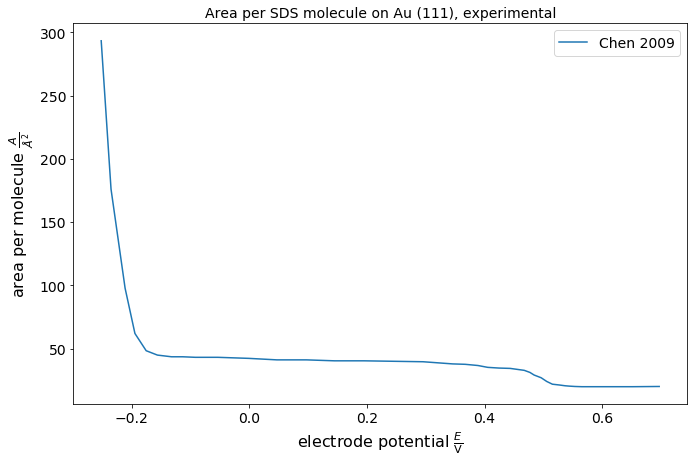

In [172]:
plt.plot(exp_chen2009_fig4a_data[["E"]],
             exp_chen2009_fig4a_data[["A"]] / C.angstrom**2,
             label = "Chen 2009")
plt.xlabel(r'electrode potential $\frac{E}{\mathrm{V}}$')
plt.ylabel(r'area per molecule $\frac{A}{\AA^2}$')
plt.title("Area per SDS molecule on Au (111), experimental")
plt.legend()

##### Figure 8 a

In [173]:
!cat 'data/references/chen2009potential_fig8a.csv' | head

# 16 mM SDS in pure H2O solution
# E, gamma
# (electrode potential in mV vs SCE), (surface density in 10^10 moles cm^-2)
255.22077197931168, 4.55185307424392
265.5111303353143, 4.611236728979053
275.1782965123788, 4.664035866349878
285.47172982979066, 4.703715168374638
295.13992099399155, 4.74994618817534
304.80503719678325, 4.815881560686414
316.03377127617057, 4.862153579972572


In [174]:
exp_chen2009_fig8a_data_raw = pd.read_csv('data/references/chen2009potential_fig8a.csv',
            delimiter=',',comment='#',header=None,names=["E","GammaC"])
# E      : electrode potential / mV (vs. SCE)
# GammaC : surface excess / moles cm^-2

In [175]:
exp_chen2009_fig8a_data = pd.concat([    
    exp_chen2009_fig8a_data_raw[["E"]]*C.milli, # mV -> V
    exp_chen2009_fig8a_data_raw[["GammaC"]] / 1e10 / C.centi**2 #  1e10 moles cm^-2 --> moles m^-2
    ], axis=1)

In [176]:
exp_chen2009_fig8a_data.loc[exp_chen2009_fig8a_data["GammaC"] < 0.0, "GammaC"]

Series([], Name: GammaC, dtype: float64)

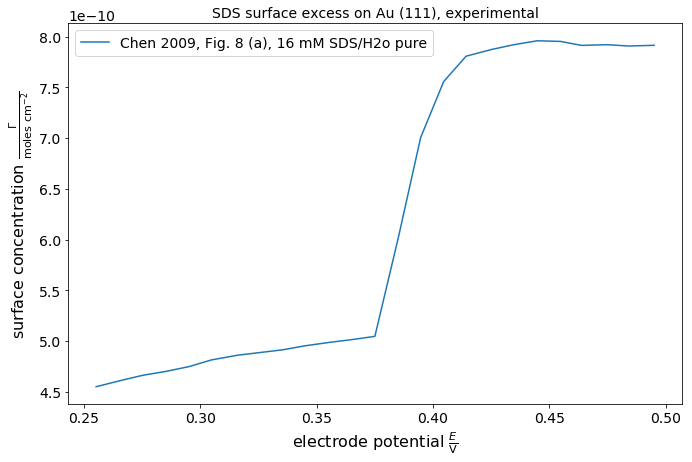

In [177]:
plt.plot(exp_chen2009_fig8a_data[["E"]],
             exp_chen2009_fig8a_data[["GammaC"]]*C.centi**2,
             label = "Chen 2009, Fig. 8 (a), 16 mM SDS/H2o pure")
plt.xlabel(r'electrode potential $\frac{E}{\mathrm{V}}$')
plt.ylabel(r'surface concentration $\frac{\Gamma}{\mathrm{moles \ cm^{-2}}}$')
plt.title("SDS surface excess on Au (111), experimental")
plt.legend()

In [178]:
# surface number density, mol m^-2 * (mol^-1) = m^-2
exp_chen2009_fig8a_data[["GammaN"]] = exp_chen2009_fig8a_data[["GammaC"]] * C.Avogadro

In [179]:
# area per molecule, m^2
exp_chen2009_fig8a_data[["A"]] = 1 / exp_chen2009_fig8a_data[["GammaN"]]

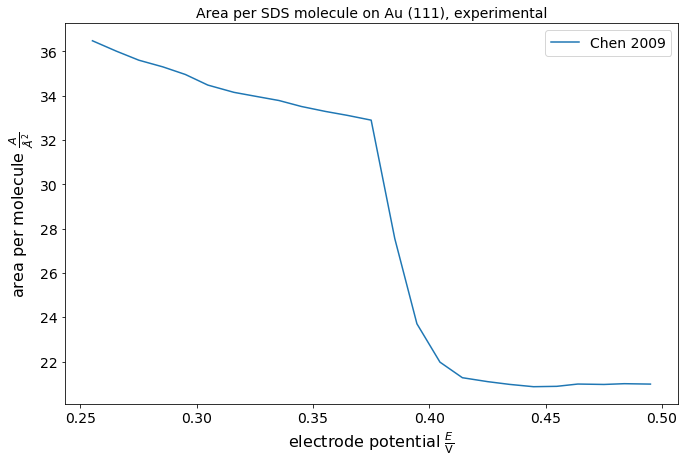

In [180]:
plt.plot(exp_chen2009_fig8a_data[["E"]],
             exp_chen2009_fig8a_data[["A"]] / C.angstrom**2,
             label = "Chen 2009")
plt.xlabel(r'electrode potential $\frac{E}{\mathrm{V}}$')
plt.ylabel(r'area per molecule $\frac{A}{\AA^2}$')
plt.title("Area per SDS molecule on Au (111), experimental")
plt.legend()

In [181]:
# Standard electrode potentials
E0_SCE = 0.2444 # V vs. SHE at 25 deg C
# saturated calomel electrode vs. standard hydrogen electrode 
# https://en.wikipedia.org/wiki/Saturated_calomel_electrode

E0_Ag_AgCl = 0.22249 # V vs. SHE at 25 deg C
# AgCl(s) + e- <=> Ag(s) + Cl- vs. standard hydrogfen electrode
# https://en.wikipedia.org/wiki/Silver_chloride_electrode

E_SCE_diff_Ag_AgCl = E0_SCE - E0_Ag_AgCl

In [182]:
E_SCE_diff_Ag_AgCl

0.021910000000000013

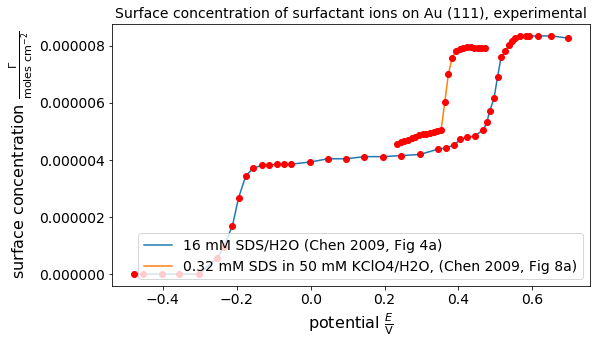

In [183]:
# ATTENTION: these plots not yet comparable!
rows = 1
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_chen2009_fig4a_data[["E"]],
                   exp_chen2009_fig4a_data[["GammaC"]],
                   title = "Surface concentration of surfactant ions on Au (111), experimental", 
                   xlabel = r'potential $\frac{E}{\mathrm{V}}$', 
                   ylabel = r'surface concentration $\frac{\Gamma}{\mathrm{moles \ cm^{-2}}}$',
                   legend = "16 mM SDS/H2O (Chen 2009, Fig 4a)", fig = fig, pos = p)
_, _ = addSubplot( exp_chen2009_fig4a_data[["E"]],
                   exp_chen2009_fig4a_data[["GammaC"]],
                   fmtstr='ro', fig = fig, pos = p, ax = ax)

_, _ = addSubplot(exp_chen2009_fig8a_data[["E"]] - E_SCE_diff_Ag_AgCl,
                   exp_chen2009_fig8a_data[["GammaC"]],
                   legend = "0.32 mM SDS in 50 mM KClO4/H2O, (Chen 2009, Fig 8a)", 
                   fig = fig, pos = p, ax=ax)
_, _ = addSubplot( exp_chen2009_fig8a_data[["E"]] - E_SCE_diff_Ag_AgCl,
                   exp_chen2009_fig8a_data[["GammaC"]],
                   fmtstr='ro', fig = fig, pos = p, ax = ax)

# p = next(pos)
# _, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
#                    exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
#                    title = "Area per surfactant molecule on Au (111), experimental", 
#                    xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
#                    ylabel = r'area per molecule $\frac{A}{\AA^2}$',
#                    legend = "DS-, Chen 2009", fig = fig, pos = p)
# _, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
#                    exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
#                    fmtstr='ro', fig = fig, pos = p, ax = ax)
# _, _ = addSubplot( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                    exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
#                    legend = "CTA+, Kawasaki 2007", fig = fig, pos = p, ax = ax)
# _, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                    exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
#                    fmtstr='ro', fig = fig, pos = p, ax = ax)
# ax.set_xscale("log")
# ax.set_yscale("log")

fig.tight_layout()

##### SKLT unpublished

In [184]:
!cat 'data/references/sklt_unpublished_fig1.csv' | head

# QCM SDS on Au (surface unspecified)
# c, gamma
# (bulk concentration in mM), (adsorption mass in ng/cm^2)
0.1, 4.0994623655914
0.5, 23.252688172043023
1.0, 44.75806451612905
2.0, 56.18279569892472
5.0, 120.36290322580643
10.0, 148.58870967741936


In [185]:
exp_sklt_unpublished_fig1_data_raw = pd.read_csv('data/references/sklt_unpublished_fig1.csv',
            delimiter=',',comment='#',header=None,names=["c","GammaM"])
# cE      : bulk concenctration / mM 
# GammaM : surface mass density / ng cm^-2

In [186]:
exp_sklt_unpublished_fig1_data = pd.concat([    
    exp_sklt_unpublished_fig1_data_raw[["c"]]*C.milli, # mM --> M
    exp_sklt_unpublished_fig1_data_raw[["GammaM"]] * (C.nano * C.gram) / C.centi**2 # ng cm^-2 --> kg m^-2
    ], axis=1)

In [187]:
# surface concentration, kg m^-2 * (mol/kg) = mol m^-2
exp_sklt_unpublished_fig1_data[["GammaC"]] = exp_sklt_unpublished_fig1_data[["GammaM"]] / M_DSm

In [188]:
# surface number density, mol m^-2 * (mol^-1) = m^-2
exp_sklt_unpublished_fig1_data[["GammaN"]] = exp_sklt_unpublished_fig1_data[["GammaC"]] * C.Avogadro

In [189]:
# area per molecule, m^2
exp_sklt_unpublished_fig1_data[["A"]] = 1 / exp_sklt_unpublished_fig1_data[["GammaN"]]

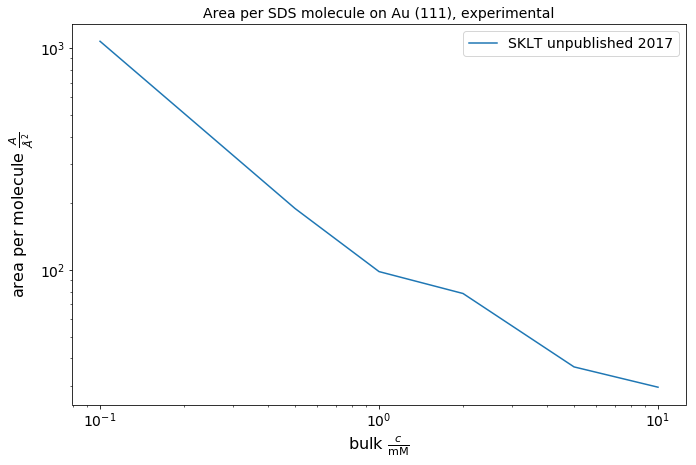

In [190]:
plt.loglog( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
             exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
             label = "SKLT unpublished 2017")
plt.xlabel(r'bulk $\frac{c}{\mathrm{mM}}$')
plt.ylabel(r'area per molecule $\frac{A}{\AA^2}$')
plt.title("Area per SDS molecule on Au (111), experimental")
plt.legend()

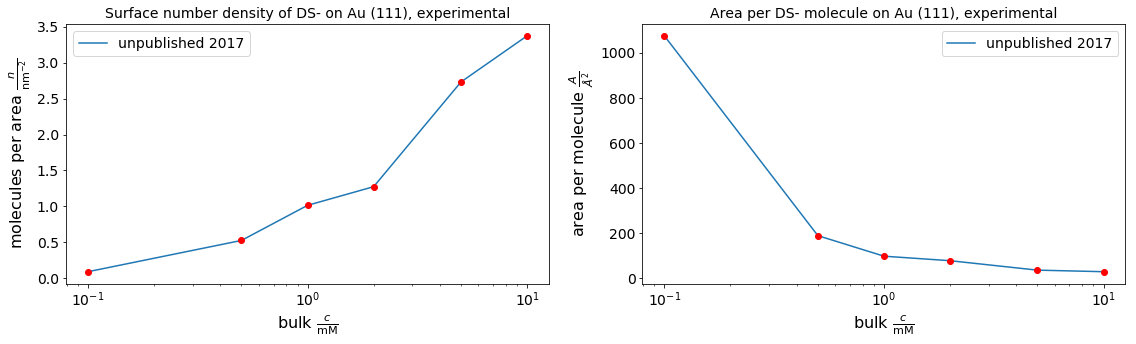

In [191]:
rows = 1
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   title = "Surface number density of DS- on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   title = "Area per DS- molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")

fig.tight_layout()

#### Kawasaki 2007

In [192]:
exp_kawasaki2007influence_fig1b_data_raw = pd.read_csv('data/references/kawasaki2007influence_fig1b.csv',
            delimiter=',',comment='#',header=1,names=["c","GammaM"])
# c      : bulk concentration / mM
# GammaM : adsorption mass / ng cm⁻2

In [193]:
exp_kawasaki2007influence_fig1b_data = pd.concat([    
    exp_kawasaki2007influence_fig1b_data_raw[["c"]] * C.milli, # mM --> M
    exp_kawasaki2007influence_fig1b_data_raw[["GammaM"]] * (C.nano * C.gram) / C.centi**2 # ng cm^-2 --> kg m^-2
    ], axis=1)

In [194]:
# surface concentration, kg m^-2 * (mol/kg) = mol m^-2
exp_kawasaki2007influence_fig1b_data[["GammaC"]] = exp_kawasaki2007influence_fig1b_data[["GammaM"]] / M_CTAp

In [195]:
# surface number density, mol m^-2 * (mol^-1) = m^-2
exp_kawasaki2007influence_fig1b_data[["GammaN"]] = exp_kawasaki2007influence_fig1b_data[["GammaC"]] * C.Avogadro

In [196]:
# area per molecule, m^2
exp_kawasaki2007influence_fig1b_data[["A"]] = 1 / exp_kawasaki2007influence_fig1b_data[["GammaN"]]

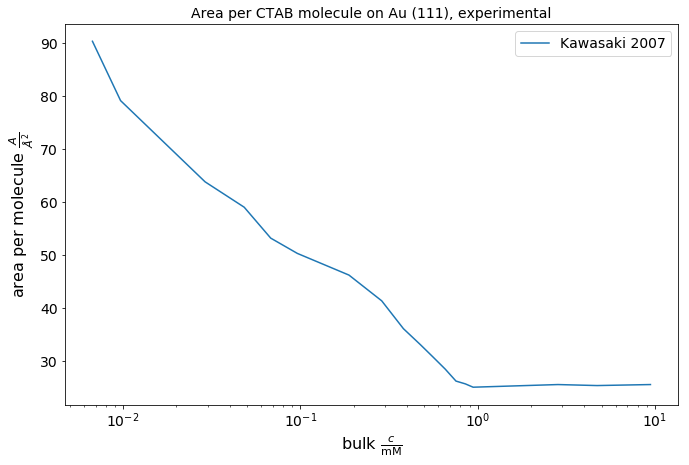

In [197]:
plt.semilogx(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
             exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
             label = "Kawasaki 2007")
plt.xlabel(r'bulk $\frac{c}{\mathrm{mM}}$')
plt.ylabel(r'area per molecule $\frac{A}{\AA^2}$')
plt.title("Area per CTAB molecule on Au (111), experimental")
plt.legend()

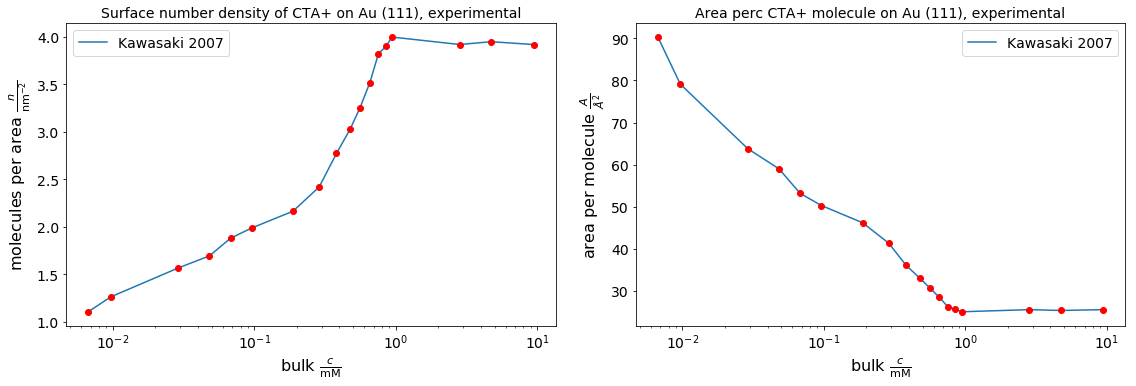

In [198]:
rows = 2
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   title = "Surface number density of CTA+ on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
_, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")

p = next(pos)
_, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
                   title = "Area perc CTA+ molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
_, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] /C.angstrom**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")

fig.tight_layout()

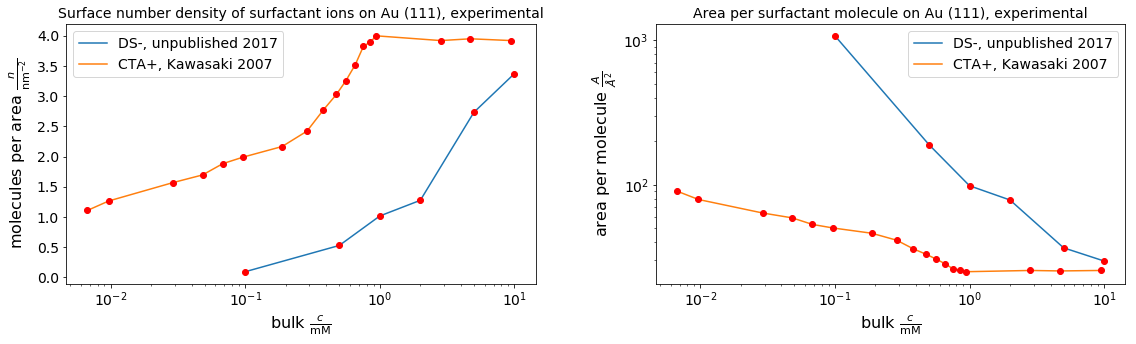

In [199]:
rows = 1
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   title = "Surface number density of surfactant ions on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "DS-, unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)

_, _ = addSubplot( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "CTA+, Kawasaki 2007", fig = fig, pos = p, ax = ax)
_, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)

ax.set_xscale("log")

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   title = "Area per surfactant molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "DS-, unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
_, _ = addSubplot( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
                   legend = "CTA+, Kawasaki 2007", fig = fig, pos = p, ax = ax)
_, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")
ax.set_yscale("log")

fig.tight_layout()

#### Ducker 1996

In [200]:
exp_dasilva2018molecular

surfactant                                                        CTAB
solvent                                                            H2O
cmc1st                                                         0.00092
cmc2nd                                                            0.27
T_Krafft                                                           298
reference_key                                     dasilva2018molecular
reference_comment    1st cmd:  Goyal, P. S.; Dasannacharya, B. A.; ...
dtype: object

In [201]:
columns_experimental

['surfactant',
 'solvent',
 'cmc1st',
 'cmc2nd',
 'T_Krafft',
 'reference_key',
 'reference_comment']

In [202]:
experimental_template.index

Index(['surfactant', 'solvent', 'cmc1st', 'cmc2nd', 'T_Krafft',
       'reference_key', 'reference_comment'],
      dtype='object')

In [203]:
exp_df = pd.DataFrame(columns=experimental_template.index)

In [204]:
exp_df = exp_df.append(exp_dasilva2018molecular,ignore_index=True)

In [205]:
exp_df

,surfactant,solvent,cmc1st,cmc2nd,T_Krafft,reference_key,reference_comment
0,CTAB,H2O,0.00092,0.27,298,dasilva2018molecular,"1st cmd: Goyal, P. S.; Dasannacharya, B. A.; ..."


In [206]:
exp_ducker1996effect = {
    "surfactant":           "CTAB",
    "solvent":              "H2O",
    "c_sphere2rod":         0.14, # M, transition from spherical to rodlike micelles
    "c_cylindrical":        {"mica": 0.0035}, # M, formation of cylindrical aggregates on substrate
    "reference_key":        "ducker1996effect",
    "reference_comment":    "Ducker, W. A., & Grant, L. M. (1996). "
                            "Effect of substrate hydrophobicity on surfactant surface-aggregate geometry. "
                            "The Journal of Physical Chemistry, 100(28), 11507–11511."
                            ""
                            "  For example, hexadecyltrimethylammonium bro-mide (CTAB) "
                            "  in bulk undergoes a transition from spherical to "
                            "  cylindrical micelles at 0.14 M. "
                            "  Reiss-Husson, F.; Luzzati, V. J. Phys. Chem. 1964, 68, 3504-3511."
                            ""
                            "  a single-chain quaternary ammonium surfactant will formcylindrical "
                            "  aggregates onmica8 at only twice the cmc, 0.0035 M. "
                            "  Sepulveda, L.; Cortes, J. J. Phys. Chem. 1985, 89, 5322-5324."
}

In [207]:
exp_reiss1964structure_sds = { # small angle x-ray scattering
    "surfactant":           "SDS",
    "solvent":              "H2O",
    "cmc1st":               { (298 + 25): cMolar(2e-3, M_SDS), # T: c, [T] = K, [c] = M
                              (298 + 70): cMolar(3e-3, M_SDS)},
    "c_sphere2rod":         { (298 + 27): cMolar(0.25, M_SDS), # T: c, [T] = K, [c] = M
                              (298 + 70): cMolar(0.15, M_SDS)},
    "R_par":                { (298 + 25): 1.78,   # "paraffinic" kernel
                              (298 + 70): 1.70 }, # rad. of gyration, [R_par] = nm, used R_par from Tab 4
    "R_pol":                { (298 + 25): 2.4,
                              (298 + 70): 2.3 },  # 
    "n_agg":                { (298 + 25): 67,     # aggregation number
                              (298 + 70): 57 },   
    "reference_key":        "reiss1964structure",
}

In [208]:
exp_reiss1964structure_sds

{'R_par': {323: 1.78, 368: 1.7},
 'R_pol': {323: 2.4, 368: 2.3},
 'c_sphere2rod': {325: 0.8643349562370826, 368: 0.5186009737422496},
 'cmc1st': {323: 0.006914679649896662, 368: 0.010372019474844991},
 'n_agg': {323: 67, 368: 57},
 'reference_key': 'reiss1964structure',
 'solvent': 'H2O',
 'surfactant': 'SDS'}

In [209]:
exp_reiss1964structure_ctab = {
    "surfactant":           "CTAB",
    "solvent":              "H2O",
    "reference_key":        "reiss1964structure",
    "c_sphere2rod":         { (298 + 27): cMolar(0.05, M_CTAB), # T: c, [T] = K, [c] = M
                              (298 + 50): cMolar(0.17, M_CTAB),
                              (298 + 70): cMolar(0.27, M_CTAB)}
}

In [210]:
exp_reiss1964structure_ctab

{'c_sphere2rod': {325: 0.1367814515022637,
  348: 0.4650569351076965,
  368: 0.738619838112224},
 'reference_key': 'reiss1964structure',
 'solvent': 'H2O',
 'surfactant': 'CTAB'}

### Surfacatant models

In [211]:
ref_df = pd.DataFrame(columns=columns_reference_df)

In [212]:
sys_df = pd.DataFrame()

In [213]:
ref_df

,unique_key,category,surfactant,ff,ff_comment,pbc,production_time,ensemble,solvent,solvent_model,reference_key,reference_comment


In [214]:
# Shelley et al. 

In [215]:
# MacKerell Jr 1995
mackerelljr1995molecular = {
    "unique_key":           "mackerelljr1995molecular",
    "category":             "micelle", # micelle, adsorption, single ...
    "surfactant":           "SDS",
    "ff":                   "CHARMM",
    "pbc":                  True,
    "production_time":      120e-12, # in seconds
    "ensemble":             "NPT",
    "solvent":              "water",
    "solvent_model":        "TIP3P",
    "reference_key":        "mackerelljr1995molecular",
    "reference_comment":    "MacKerell Jr, A. D. (1995). Molecular dynamics simulation analysis of a sodium dodecyl sulfate micelle in aqueous solution: decreased fluidity of the micelle hydrocarbon interior. The Journal of Physical Chemistry, 99(7), 1846–1855. https://doi.org/10.1021/j100007a011",
    "year":                 1995
}

In [216]:
ingram2013prediction_sds = {
    "unique_key":           "ingram2013prediction_sds",
    "category":             "micelle", # micelle, adsorption, single ...
    "surfactant":           "SDS",
    "ff":                   "CHARMM36",
    "pbc":                  True,
    "ensemble":             "NVT, NPT",
    "solvent":              "water",
    "solvent_model":        "CHARMM-TIP3P",
    "reference_key":        "ingram2013prediction",
    "reference_comment":    "Ingram, T., Storm, S., Kloss, L., Mehling, T., Jakobtorweihen, S., & Smirnova, I. (2013). Prediction of micelle/water and liposome/water partition coefficients based on molecular dynamics simulations, COSMO-RS, and COSMOmic. Langmuir, 29(11), 3527–3537. https://doi.org/10.1021/la305035b",
    "year":                 2013, 
    
    # parameters
    "package":              "GROMACS 4.5.3",
    "dt":                   2e-15, # time step
    "production_time":      400e-9, # in seconds
    
    "thermostat":           "nose-hoover",
    "thermostat_tau_t":     1e-12, # in seconds
    "temperature":          298, # K
    "barostat":             "parrinello-rahman",
    "barostat_tau_p":       1e-12, # in seconds for micelles, BUT for bilayer tau_p = 5e-12 s
    "pressure":             1, # bar, = 1e5 Pa = 1e3 hPa
    "c_surfactant":         1, # M = 1000 mol / m^3
    "n_surfactant":         216,
    "n_ion":                216,
    "n_solvent":            8535,
    
    "energey_minimization": True,
    "nvt_equilibration":    600e-12, # seconds
    "npt_equilibration":    None,
    
    # constraints
    "constraints":          "h-bonds", # all hydrogen bonds
    "constraint_algorithm": "LINCS",
    
    # CHARMM-specific
    "inner_lj_cutoff":      0.8e-9,
    "outer_lj_cutoff":      1.2e-9,
    "coulomb_cutoff":       1.0e-9,
    "long_range_method":    "PME", # particle mesh Ewald
    
    # SDS-specific:
    "sds_model":            "CHARMM36-native"
}

In [217]:
ingram2013prediction_ctab = {
    "unique_key":           "ingram2013prediction_ctab",
    "category":             "micelle", # micelle, adsorption, single ...
    "surfactant":           "CTAB",
    "ff":                   "CHARMM36",
    "pbc":                  True,
    "ensemble":             "NVT, NPT",
    "solvent":              "water",
    "solvent_model":        "CHARMM-TIP3P",
    "reference_key":        "ingram2013prediction",
    "reference_comment":    "Ingram, T., Storm, S., Kloss, L., Mehling, T., Jakobtorweihen, S., & Smirnova, I. (2013). Prediction of micelle/water and liposome/water partition coefficients based on molecular dynamics simulations, COSMO-RS, and COSMOmic. Langmuir, 29(11), 3527–3537. https://doi.org/10.1021/la305035b",
    "year":                 2013,
    
    # parameters
    "package":              "GROMACS 4.5.3",
    "dt":                   2e-15, # time step
    "production_time":      400e-9, # in seconds
    "thermostat":           "nose-hoover",
    "thermostat_tau_t":     1e-12, # in seconds
    "temperature":          298, # K
    "barostat":             "parrinello-rahman",
    "barostat_tau_p":       1e-12, # in seconds for micelles, BUT for bilayer tau_p = 5e-12 s
    "pressure":             1, # bar, = 1e5 Pa = 1e3 hPa
    
    "c_surfactant":         0.73, # M = 1000 mol / m^3
    "n_surfactant":         216,
    "n_ion":                216,
    "n_solvent":            12000,
    
    "energey_minimization": True,
    "nvt_equilibration":    600e-12, # seconds
    "npt_equilibration":    None,
    "production_ensemble":  "NPT",
    "production_time":      100e-9,
    
    # CHARMM-specific
    "inner_lj_cutoff":      0.8e-9,
    "outer_lj_cutoff":      1.2e-9,
    "coulomb_cutoff":       1.0e-9,
    "long_range_method":    "PME", # particle mesh Ewald
    # CTAB-specific:    
}

In [218]:
ingram2013prediction_ctab2 = ingram2013prediction_ctab.copy()
ingram2013prediction_ctab2["unique_key"]   = "ingram2013prediction_ctab2"
ingram2013prediction_ctab2["c_surfactant"] = 0.1 # M
ingram2013prediction_ctab2["n_solvent"]    = 120000

In [219]:
# same group, samye year, very related
# reports experimental cmc:
# SDS 8e-3 M to 9e-3 M
storm2013molecular_sds = ingram2013prediction_sds.copy()
storm2013molecular_sds["unique_key"]    = "storm2013molecular_sds"
storm2013molecular_sds["reference_key"] = "storm2013molecular"
storm2013molecular_sds["reference_comment"] = "Storm, S., Jakobtorweihen, S., Smirnova, I., & Panagiotopoulos, A. Z. (2013). Molecular dynamics simulation of SDS and CTAB micellization and prediction of partition equilibria with COSMOmic. Langmuir, 29(37), 11582–11592. https://doi.org/10.1021/la402415b"

storm2013molecular_sds["c_surfactant"]    = 1 # M = mol / L
storm2013molecular_sds["n_solvent"]       = 8535
storm2013molecular_sds["production_time"] = 100e-9 # s
storm2013molecular_sds["barostat_tau_p"]  = 2e-12 # s


In [220]:
storm2013molecular_sds2 = storm2013molecular_sds.copy()
storm2013molecular_sds["unique_key"]    = "storm2013molecular_sds2"
storm2013molecular_sds2["n_solvent"]    = 25605
storm2013molecular_sds2["c_surfactant"] = 0.041 # M

In [221]:
# reports experimental cmc:
# CTAB 9e-4 M to 10e-4 M
storm2013molecular_ctab = storm2013molecular_sds.copy()
storm2013molecular_ctab["unique_key"]    = "storm2013molecular_ctab"
storm2013molecular_ctab["surfactant"]   = "CTAB"
storm2013molecular_ctab["n_solvent"]    = 12000
storm2013molecular_ctab["c_surfactant"] = 0.73 # M
storm2013molecular_ctab["ctab_model"]   = "CHARMM36 DSPE/LPPC hybrid"
storm2013molecular_ctab["bromide_model"]= "Horinek" 
  # Horinek, D.; Mamatkulov, S. I.; Netz, R. R. Rational design of
  # ion force fields based on thermodynamic solvation properties. 
  # J. Chem. Phys. 2009, 130, 124507

In [222]:
storm2013molecular_ctab2 = storm2013molecular_ctab.copy()
storm2013molecular_ctab["unique_key"]    = "storm2013molecular_ctab2"
storm2013molecular_ctab2["n_solvent"]    = 120000
storm2013molecular_ctab2["c_surfactant"] = 0.1 # M

#### DaSilva 2018
Closely relatet to Meena & Sulpizi

> As expected, the
counterions (bromide) are located near the external positively charged border of the CTA+
aggregates; however,
it is important to mention that many assembly properties, such as the morphology, size, charge, and intra-micellar interactions, depend on the nature of the counterion.27,28 This is particularly evident if one compares the structural properties of CTAB and CTAC, [CH3
(CH2 )15 N+ (CH3 )3 ]Cl− .
They differ in many aspects of the micellar behavior; for example, CTAC shows no spherical-cylindrical transition in its micelles, even at high concentrations of CTAC.29

In [223]:
# article
dasilva2018molecular = {
    "unique_key":           "dasilva2018molecular",
    "category":             ["micelle","adsorption"], # micelle, adsorption, single ...
    "surfactant":           ["CTAC","CTAB"],
    "ff":                   "GROMOS54A7",
    "pbc":                  True,
    "ensemble":             "NPT",
    "solvent":              "water",
    "solvent_model":        "SPC",
    "reference_key":        "dasilva2018molecular",
    "reference_comment":    "J. A. Da Silva, R. P. Dias, G. C. A. Da Hora, T. A. Soares, and M. R. Meneghetti, “Molecular dynamics simulations of cetyltrimethylammonium bromide (CTAB) micelles and their interactions with a gold surface in aqueous solution,” J. Braz. Chem. Soc., vol. 29, no. 1, pp. 191–199, 2018.",
    "year":                 2018,
    
    # parameters
    "package":              "GROMACS 4.5.3",
    "dt":                   2e-15, # time step, in seconds
    "thermostat":           "Berendsen",
    "thermostat_tau_t":     0.4e-12, # in seconds
    "temperature":          300, # K
    "barostat":             "parrinello-rahman",
    "barostat_tau_p":       0.4e-12, # in second
    "pressure":             1, # bar, = 1e5 Pa = 1e3 hPa
    
    "permittivity":         66., # coarse-graining needs permittivity > 1?
    
    "parameter_comments":   "The center-of-mass motion was removed every 5 steps."\
                            "Anisotropic coordinate scaling was used with a relaxation "\
                            "time of 0.4 ps and a compressibility of 4.5 × 10^−5 bar^−1",
    
    "energey_minimization": 5000, # steps
    #"nvt_equilibration":    600e-12, # seconds
    #"npt_equilibration":    None,
    "production_ensemble":  "NPT",
    "production_time":      200e-9, # in seconds
    
    # CHARMM-specific
    #"inner_lj_cutoff":      0.8e-9,
    #"outer_lj_cutoff":      1.2e-9,
    "lj_cutoff":            1.4e-9, # m
    "coulomb_cutoff":       1.4e-9, # m
    #"long_range_method":    "PME", # particle mesh Ewald
    
    # material-specific:   
    "ctab_model":           "adapted from the dipalmitoylphosphatidylcholine lipid in the" \
                            "GROMOS parameter set gromos54a7. (DPPC, jlh)",
    "chloride_model":       "chloride Lennard-Jones atomic parameter (LJAP) "\
                            "was taken from the GROMOS parameter set gromos54a7. ",
    "bromide_model":        "by Hasse and co-workers, Netz and co-workers, and Reiser et al. "\
                            "Deublein, S.; Vrabec, J.; Hasse, H.; J. Chem. Phys. 2012, 136, 501. "\
                            "Mamatkulov, S.; Fyta, M.; Netz, R. R.; J. Chem. Phys. 2013, 138, 505. "\
                            "Reiser, S.; Deublein, S.; Vrabec, J.; Hasse, H.; J. Chem. Phys. 2014, 140, 504.",
    "gold_model":           "by Heinz et al. " \
                            "Heinz, H.; Vaia, R. A.; Farmer, B. L.; Naik, R. R.; J. Phys. Chem. C 2008, 112, 17281."
    
}

In [224]:
# systems derived from article
dasilva2018molecular_ctac = {
    # parameters
    "unique_key":           "dasilva2018molecular_ctac",
    "category":             "micelle", # micelle, adsorption, single ...
    "surfactant":           "CTAC",
    "solvent":              "water",
    "counterion":           "CL",
    "reference_key":        "dasilva2018molecular",
    
    #"c_surfactant":        ?, # M = 1000 mol / m^3
    "n_surfactant":         90,
    "n_ion":                90,
    "n_solvent":            4980,

    "initial_config":       "bilayer"}

In [225]:
# systems derived from article
dasilva2018molecular_ctab = {
    # parameters
    "unique_key":           "dasilva2018molecular_ctab",
    "category":             "micelle", # micelle, adsorption, single ...
    "surfactant":           "CTAB",
    "solvent":              "water",
    "counterion":           "BR",
    "reference_key":        "dasilva2018molecular",
    
    #"c_surfactant":        ?, # M = 1000 mol / m^3
    "n_surfactant":         90,
    "n_ion":                90,
    "n_solvent":            4980,

    "initial_config":       "bilayer"}

In [226]:
dasilva2018molecular_ctab_on_au = {
    # parameters
    "unique_key":           "dasilva2018molecular_ctab_on_au",
    "category":             "adsorbtion", # micelle, adsorption, single ...
    "surfactant":           "CTAB",
    "counterion":           "BR",
    "substrate":            "AU100",
    "reference_key":        "dasilva2018molecular",
    
    #"c_surfactant":         0.73, # M = 1000 mol / m^3
    "n_surfactant":         180,
    "n_ion":                180,
    "n_solvent":            4766,
    "n_substrate":          1600,
        
    "initial_config":       "2 bilayer"}

#### Build reference data frame

In [227]:
ref_df = ref_df.append(mackerelljr1995molecular,ignore_index=True)

# move into sys df
ref_df = ref_df.append(ingram2013prediction_sds,ignore_index=True)
ref_df = ref_df.append(ingram2013prediction_ctab,ignore_index=True)
ref_df = ref_df.append(ingram2013prediction_ctab2,ignore_index=True)

# move into sys df
ref_df = ref_df.append(storm2013molecular_sds,ignore_index=True)
ref_df = ref_df.append(storm2013molecular_sds2,ignore_index=True)
ref_df = ref_df.append(storm2013molecular_ctab,ignore_index=True)
ref_df = ref_df.append(storm2013molecular_ctab2,ignore_index=True)

ref_df = ref_df.append(dasilva2018molecular,ignore_index=True)

ref_df.set_index(keys="unique_key",inplace=True)

In [228]:
ref_df.loc["dasilva2018molecular"]

category                                            [micelle, adsorption]
surfactant                                                   [CTAC, CTAB]
ff                                                             GROMOS54A7
ff_comment                                                            NaN
pbc                                                                  True
production_time                                                     2e-07
ensemble                                                              NPT
solvent                                                             water
solvent_model                                                         SPC
reference_key                                        dasilva2018molecular
reference_comment       J. A. Da Silva, R. P. Dias, G. C. A. Da Hora, ...
year                                                                 2018
barostat                                                parrinello-rahman
barostat_tau_p                        

#### Build system data frame

In [229]:
sys_df = sys_df.append(dasilva2018molecular_ctac, ignore_index=True)

sys_df = sys_df.append(dasilva2018molecular_ctab, ignore_index=True)

sys_df = sys_df.append(dasilva2018molecular_ctab_on_au, ignore_index=True)

sys_df.set_index(keys="unique_key",inplace=True)

In [230]:
sys_df

,category,counterion,initial_config,n_ion,n_solvent,n_surfactant,reference_key,solvent,surfactant,n_substrate,substrate
unique_key,,,,,,,,,,,
dasilva2018molecular_ctac,micelle,CL,bilayer,90.0,4980.0,90.0,dasilva2018molecular,water,CTAC,NaN,NaN
dasilva2018molecular_ctab,micelle,BR,bilayer,90.0,4980.0,90.0,dasilva2018molecular,water,CTAB,NaN,NaN
dasilva2018molecular_ctab_on_au,adsorbtion,BR,2 bilayer,180.0,4766.0,180.0,dasilva2018molecular,NaN,CTAB,1600.0,AU100


## Derivation of computational system setups 

### Considerations on system setup

#### Jour Fixe Discussion 1 Aug 2018

* solute
  * ~~prearrange ions close to CTAB polar head~~
* substrate
  * ~~pbc must coincide with crystal lattice constant~~
  * ~~slab at tangential boundary~~
  * ~~lookup "slab correction"~~
  * use EAM potential instead of LJ
  * small system with thicker layer for comparison
  * ~~fix COM~~
* indenter 
  * preferably filled indenter, tempered
  * ~~alternatively hollow indenter, fixed~~
  * use SiO2 model (INTEFACE FF) 
  * ~~use AU 111, scale~~
  * run indenter in water only
* thermo- & barostat
  * equilibration
    * ~~temp: Langevin; press: Bernedsen (stable) ~~
      ~~temp: Langevin, press: Berendsen aniso~~
      **dilate keyword?**
  * production: 
    * ~~press: NPH (Anderson, Parinello-Rahman)~~
    * ~~temp: Langevin on substrate only, NVE on solution~~
  * ~~temper substrate~~
  * ~~barostat anisotropic (aniso keyword)~~
  


### from Jaschke 1997

#### Select representative Au(111) slabs

In [231]:
# Jaschke, M., Butt, H.-J., Gaub, H.E., Manne, S., 1997. 
# Surfactant Aggregates at a Metal Surface. Langmuir 13, 1381–1384.
# distance between stripelike aggregates
d_C14TAB  = 6.0 * C.nano # +- 0.5 nm 
d_C16TAOH = 6.1 * C.nano # +- 0.5 nm
d_SDS     = 4.9 * C.nano # +- 0.5 nm 

In [232]:
# INTERFACE Au (111) unit cell
unit_cell_AU_111 =  np.array([2.8837, 4.9948, 7.0637]) * C.angstrom

In [233]:
unit_cell_AU_111 # surface normal in z direction

array([2.8837e-10, 4.9948e-10, 7.0637e-10])

In [234]:
np.round(d_C14TAB / unit_cell_AU_111)

array([21., 12.,  8.])

In [235]:
np.round(d_C16TAOH / unit_cell_AU_111)

array([21., 12.,  9.])

In [236]:
np.round(d_SDS / unit_cell_AU_111)

array([17., 10.,  7.])

In [237]:
# approximately matches the distance between two stripes for CTAB on AU 111
multiples_AU_111_to_fit_1_CTAB_aggregate   = np.array([21,12,0])
 # approximately matches 1.5 distances between two stripes of CTAB on AU 111
multiples_AU_111_to_fit_1_5_CTAB_aggregate = np.array([30,18,0])
# approximately matches the distance between two stripes of SDS on AU 111
multiples_AU_111_to_fit_1_SDS_aggregate    = np.array([17,10,0])
# approximately matches 1.5 distances between two stripes of SDS on AU 111
multiples_AU_111_to_fit_1_5_SDS_aggregate  = np.array([26,15,0])

In [238]:
AU_111_thickness_in_multiples = np.array([0,0,2])

In [239]:
sb_area_multiples_CTAB = [ multiples_AU_111_to_fit_1_CTAB_aggregate,
                 multiples_AU_111_to_fit_1_5_CTAB_aggregate,
                 #multiples_AU_111_to_fit_1_SDS_aggregate,
                 #multiples_AU_111_to_fit_1_5_SDS_aggregate, 
                 3*multiples_AU_111_to_fit_1_CTAB_aggregate, 
                 2*multiples_AU_111_to_fit_1_CTAB_aggregate +
                    multiples_AU_111_to_fit_1_5_CTAB_aggregate,
                 #3*multiples_AU_111_to_fit_1_SDS_aggregate, 
                 #2*multiples_AU_111_to_fit_1_SDS_aggregate +
                 #   multiples_AU_111_to_fit_1_5_SDS_aggregate 
                    ]

In [240]:
sb_area_multiples_SDS = [ 
                 multiples_AU_111_to_fit_1_SDS_aggregate,
                 multiples_AU_111_to_fit_1_5_SDS_aggregate, 
                 3*multiples_AU_111_to_fit_1_SDS_aggregate, 
                 2*multiples_AU_111_to_fit_1_SDS_aggregate +
                    multiples_AU_111_to_fit_1_5_SDS_aggregate 
                    ]

In [241]:
sb_area_multiples_SDS

[array([17, 10,  0]),
 array([26, 15,  0]),
 array([51, 30,  0]),
 array([60, 35,  0])]

In [242]:
sb_area_multiples_CTAB

[array([21, 12,  0]),
 array([30, 18,  0]),
 array([63, 36,  0]),
 array([72, 42,  0])]

In [243]:
sb_multiples_SDS = sb_area_multiples_SDS + AU_111_thickness_in_multiples

In [244]:
sb_multiples_CTAB = sb_area_multiples_CTAB + AU_111_thickness_in_multiples

In [245]:
sb_multiples_SDS

array([[17, 10,  2],
       [26, 15,  2],
       [51, 30,  2],
       [60, 35,  2]])

In [246]:
sb_multiples_CTAB

array([[21, 12,  2],
       [30, 18,  2],
       [63, 36,  2],
       [72, 42,  2]])

In [247]:
sb_area_measures_SDS = sb_area_multiples_SDS * unit_cell_AU_111

In [248]:
sb_area_measures_CTAB = sb_area_multiples_CTAB * unit_cell_AU_111

In [249]:
sb_area_measures_rounded_SDS = np.round(sb_area_measures_SDS / C.angstrom) * C.angstrom

In [250]:
sb_area_measures_rounded_CTAB = np.round(sb_area_measures_CTAB / C.angstrom) * C.angstrom

In [251]:
sb_area_measures_CTAB / C.angstrom  # surface area dimensions in Angstrom

array([[ 60.5577,  59.9376,   0.    ],
       [ 86.511 ,  89.9064,   0.    ],
       [181.6731, 179.8128,   0.    ],
       [207.6264, 209.7816,   0.    ]])

In [252]:
sb_area_measures_rounded_SDS / C.angstrom  # surface area dimensions in Angstrom

array([[ 49.,  50.,   0.],
       [ 75.,  75.,   0.],
       [147., 150.,   0.],
       [173., 175.,   0.]])

In [253]:
sb_area_measures_rounded_CTAB / C.angstrom  # surface area dimensions in Angstrom

array([[ 61.,  60.,   0.],
       [ 87.,  90.,   0.],
       [182., 180.,   0.],
       [208., 210.,   0.]])

In [254]:
desired_box_height = 3*d_C14TAB # fit more than 2 whole aggregates

In [255]:
desired_box_height

1.8000000000000002e-08

In [256]:
# NO ROUNDING: Measures must be exact (in crystal lattice direction)
# box_measures = np.zeros(sb_area_measures_rounded.shape)
# box_measures[:,0] = sb_area_measures_rounded.max(axis=1) # surfaces are approximately square
# box_measures[:,1] = sb_area_measures_rounded.max(axis=1) # surfaces are approximately square
# box_measures[:,2] = desired_box_height
box_measures_SDS = np.zeros(sb_area_measures_SDS.shape)
box_measures_SDS[:,0] = sb_area_measures_SDS[:,0]
box_measures_SDS[:,1] = sb_area_measures_SDS[:,1]
box_measures_SDS[:,2] = desired_box_height

In [257]:
# NO ROUNDING: Measures must be exact (in crystal lattice direction)
# box_measures = np.zeros(sb_area_measures_rounded.shape)
# box_measures[:,0] = sb_area_measures_rounded.max(axis=1) # surfaces are approximately square
# box_measures[:,1] = sb_area_measures_rounded.max(axis=1) # surfaces are approximately square
# box_measures[:,2] = desired_box_height
box_measures_CTAB = np.zeros(sb_area_measures_CTAB.shape)
box_measures_CTAB[:,0] = sb_area_measures_CTAB[:,0]
box_measures_CTAB[:,1] = sb_area_measures_CTAB[:,1]
box_measures_CTAB[:,2] = desired_box_height

In [258]:
box_measures_SDS / C.angstrom # boxes in Angstrom

array([[ 49.0229,  49.948 , 180.    ],
       [ 74.9762,  74.922 , 180.    ],
       [147.0687, 149.844 , 180.    ],
       [173.022 , 174.818 , 180.    ]])

In [259]:
box_measures_CTAB / C.angstrom # boxes in Angstrom

array([[ 60.5577,  59.9376, 180.    ],
       [ 86.511 ,  89.9064, 180.    ],
       [181.6731, 179.8128, 180.    ],
       [207.6264, 209.7816, 180.    ]])

In [260]:
#sim_df = pd.DataFrame(columns=columns_simulation_properties)
sim_df = pd.DataFrame()

In [261]:
sim_df.columns

Index([], dtype='object')

### from Chen 2009 (SDS)

#### Select representative surface concentrations

In [262]:
sim_SDS_on_AU_111_template=  {
    "surfactant": "SDS",
    "substrate":  "AU",
    "counterion": "NA",
    "solvent":    "H2O",
    "sf_preassembly":   "bilayer",
    "sb_crystal_plane": 111,
    "sb_unit_cell":     [unit_cell_AU_111]*len(list(sb_multiples_SDS)),
    "sb_multiples":     list(sb_multiples_SDS),
    "ci_initial_placement":  "random",
    "sv_density":       0.997e3, # kg m^-3
    "sv_preassembly":   "random",
    "pbc":              111,
    #"box":              [np.array([64,64,128])*1e-10], # m
    "box":              list(box_measures_SDS), # m
    "temperature":      298, # K
    "pressure":         1, # atm
    }

In [263]:
# exp_chen2009_fig4a_data.loc[ np.isfinite(exp_chen2009_fig4a_data["A"]) , "A"] / C.angstrom**2

In [264]:
# molar surface concentrations, interval covered by Chen 2009
gammaC_interval_SDS = [
    exp_chen2009_fig4a_data.loc[ exp_chen2009_fig4a_data["GammaC"] > 0, "GammaC"].min(),
    exp_chen2009_fig4a_data.loc[ exp_chen2009_fig4a_data["GammaC"] > 0, "GammaC"].max() ]

In [265]:
gammaC_interval_SDS

[5.660377358490578e-07, 8.339622641509433e-06]

In [266]:
# surface number concentrations, interval covered by Chen 2009
gammaN_interval_SDS = [
    exp_chen2009_fig4a_data.loc[ exp_chen2009_fig4a_data["GammaN"] > 0, "GammaN"].min(),
    exp_chen2009_fig4a_data.loc[ exp_chen2009_fig4a_data["GammaN"] > 0, "GammaN"].max() ]

In [267]:
gammaN_interval_SDS

[3.4087589756603846e+17, 5.022238224139622e+18]

In [268]:
# molecular area (in hypothetic monolayer), interval covered by Chen 2009
A_interval_SDS = [
    exp_chen2009_fig4a_data.loc[ np.isfinite(exp_chen2009_fig4a_data["A"]) , "A"].min(),
    exp_chen2009_fig4a_data.loc[ np.isfinite(exp_chen2009_fig4a_data["A"]) , "A"].max() ]

In [269]:
np.array(A_interval_SDS) / C.angstrom**2

array([ 19.91144098, 293.36189714])

In [270]:
np.sqrt(np.array(A_interval_SDS)) / C.angstrom # square measures

array([ 4.46222377, 17.12781063])

In [271]:
sim_SDS_on_AU_111_molecular_surface_areas_of_interest = np.exp( np.linspace(
    np.log(A_interval_SDS[0]), np.log(A_interval_SDS[1]), 6) )

In [272]:
# sim_SDS_on_AU_111_molecular_surface_areas_of_interest = np.linspace(
#     A_interval_SDS[0], A_interval_SDS[1], 6)

In [273]:
# insert doubly dense hypothetic packing
sim_SDS_on_AU_111_molecular_surface_areas_of_interest = np.insert(
    sim_SDS_on_AU_111_molecular_surface_areas_of_interest, 0, 
    sim_SDS_on_AU_111_molecular_surface_areas_of_interest[0] / 2.0 )

In [274]:
sim_SDS_on_AU_111_molecular_surface_areas_of_interest / C.angstrom**2

array([  9.95572049,  19.91144098,  34.10066857,  58.40137829,
       100.01918229, 171.29453309, 293.36189714])

In [275]:
exp_chen2009_fig4a_data["E"].min(), exp_chen2009_fig4a_data["E"].max()

(-0.4795216741405084, 0.6971599402092676)

In [276]:
exp_chen2009_fig4a_potential_from_molecular_area = scipy.interpolate.interp1d(
    exp_chen2009_fig4a_data["A"],
    exp_chen2009_fig4a_data["E"], 
    axis=0, kind='linear', bounds_error=False,
    fill_value=(exp_chen2009_fig4a_data["E"].min(), 
                exp_chen2009_fig4a_data["E"].max())) # fill value does not work

In [277]:
# span of SKLT exp
np.array((exp_sklt_unpublished_fig1_data["A"].min(), 
     exp_sklt_unpublished_fig1_data["A"].max())) / C.angstrom**2

array([  29.65818438, 1074.98763389])

In [278]:
exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area = \
    scipy.interpolate.interp1d(
        exp_sklt_unpublished_fig1_data["A"],
        exp_sklt_unpublished_fig1_data["c"], 
        axis=0, kind='linear', bounds_error=False,
        fill_value="extrapolate")

In [279]:
plot_concentrations = [ 
    c for c in sim_SDS_on_AU_111_molecular_surface_areas_of_interest \
        if c > A_interval_SDS[0] ]

In [280]:
plot_concentrations

[3.4100668573279963e-19,
 5.840137829134758e-19,
 1.0001918229256068e-18,
 1.7129453309417182e-18,
 2.9336189714213184e-18]

In [281]:
# only "fictive" estimate on corresponding bulk concentrations
sim_SDS_on_AU_111_bulk_concentrations_of_interest = \
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area( 
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest)

In [282]:
sim_SDS_on_AU_111_bulk_concentrations_of_interest

array([0.02416421, 0.01700699, 0.00680627, 0.00343719, 0.00099144,
       0.00060008, 0.00045309])

In [283]:
sim_SDS_on_AU_111_bulk_concentrations_of_interest

array([0.02416421, 0.01700699, 0.00680627, 0.00343719, 0.00099144,
       0.00060008, 0.00045309])

In [284]:
A_interval_SDS[0]

1.991144098249767e-19

In [285]:
sim_SDS_on_AU_111_molecular_surface_areas_of_interest[0]

9.9557204912488e-20

In [286]:
#sim_SDS_on_AU_111_molecular_surface_areas_of_interest[0] = A_interval_SDS[0]

In [287]:
exp_chen2009_fig4a_potential_from_molecular_area( sim_SDS_on_AU_111_molecular_surface_areas_of_interest )

array([-0.47952167, -0.47952167,  0.44796148, -0.18989418, -0.21234152,
       -0.2341317 , -0.25231689])

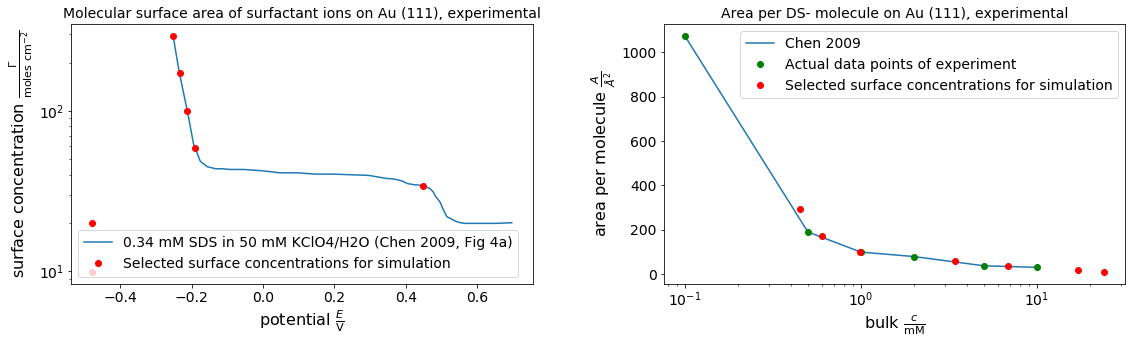

In [288]:
rows = 1
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)

_, ax = addSubplot(exp_chen2009_fig4a_data[["E"]],
                   exp_chen2009_fig4a_data[["A"]] / C.angstrom**2,
                   title = "Molecular surface area of surfactant ions on Au (111), experimental", 
                   xlabel = r'potential $\frac{E}{\mathrm{V}}$', 
                   ylabel = r'surface concentration $\frac{\Gamma}{\mathrm{moles \ cm^{-2}}}$',
                   legend = "0.34 mM SDS in 50 mM KClO4/H2O (Chen 2009, Fig 4a)", fig = fig, pos = p)
_, _ = addSubplot( exp_chen2009_fig4a_potential_from_molecular_area( 
                        sim_SDS_on_AU_111_molecular_surface_areas_of_interest ),
                   sim_SDS_on_AU_111_molecular_surface_areas_of_interest / C.angstrom**2,
                   legend = "Selected surface concentrations for simulation",
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_yscale("log")

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   title = "Area per DS- molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Chen 2009", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   legend = "Actual data points of experiment",
                   fmtstr='go', fig = fig, pos = p, ax = ax)
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area( 
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest) / C.milli,
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest / C.angstrom**2,
                   legend = "Selected surface concentrations for simulation",
                   fmtstr='ro', fig = fig, pos = p, ax = ax)
ax.set_xscale("log")
#ax.set_xscale("log")


fig.tight_layout()

#### Construct standardized system descriptions

In [289]:
sim_SDS_on_AU_111_template_df = pd.DataFrame(
    data=sim_SDS_on_AU_111_template)

In [290]:
# sim_SDS_on_AU_111_bulk_concentrations_of_interest_sr = \
#     pd.Series(sim_SDS_on_AU_111_bulk_concentrations_of_interest,
#     name="sf_concentration")

In [291]:
sim_SDS_on_AU_111_molecular_surface_areas_of_interest_sr = \
    pd.Series(sim_SDS_on_AU_111_molecular_surface_areas_of_interest,
    name="sb_area_per_sf_molecule")

In [292]:
sim_SDS_on_AU_111_molecular_surface_areas_of_interest_sr

0    9.955720e-20
1    1.991144e-19
2    3.410067e-19
3    5.840138e-19
4    1.000192e-18
5    1.712945e-18
6    2.933619e-18
Name: sb_area_per_sf_molecule, dtype: float64

In [293]:
# cartesian product of representative areas and molecular surface areas
sim_SDS_on_AU_111_df = df_crossjoin(sim_SDS_on_AU_111_template_df,
    pd.DataFrame(sim_SDS_on_AU_111_molecular_surface_areas_of_interest_sr))

In [294]:
sim_SDS_on_AU_111_df[["sb_area_per_sf_molecule","box"]]

,sb_area_per_sf_molecule,box
0,9.955720e-20,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
1,1.991144e-19,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
2,3.410067e-19,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
3,5.840138e-19,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
4,1.000192e-18,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
5,1.712945e-18,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
6,2.933619e-18,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
7,9.955720e-20,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"
8,1.991144e-19,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"
9,3.410067e-19,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"


In [295]:
# surface area in m
sim_SDS_on_AU_111_df["sb_measures"] = sim_SDS_on_AU_111_df["sb_multiples"] * sim_SDS_on_AU_111_df["sb_unit_cell"]

In [296]:
sim_SDS_on_AU_111_df[["sb_measures","box"]]

,sb_measures,box
0,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
1,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
2,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
3,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
4,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
5,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
6,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]","[4.9022900000000004e-09, 4.9948e-09, 1.8000000..."
7,"[7.49762e-09, 7.4922e-09, 1.41274e-09]","[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"
8,"[7.49762e-09, 7.4922e-09, 1.41274e-09]","[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"
9,"[7.49762e-09, 7.4922e-09, 1.41274e-09]","[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]"


In [297]:
sim_SDS_on_AU_111_df["sb_normal"] = 2 # surface normal 0,1 or 3 for x,y or z

In [298]:
sim_SDS_on_AU_111_df[["sb_volume"]] = sim_SDS_on_AU_111_df[["sb_measures"]].applymap(np.prod)

In [299]:
sim_SDS_on_AU_111_df[["sb_measures"]]

,sb_measures
0,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
1,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
2,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
3,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
4,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
5,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
6,"[4.9022900000000004e-09, 4.9948e-09, 1.41274e-09]"
7,"[7.49762e-09, 7.4922e-09, 1.41274e-09]"
8,"[7.49762e-09, 7.4922e-09, 1.41274e-09]"
9,"[7.49762e-09, 7.4922e-09, 1.41274e-09]"


In [300]:
# select component of array in column "sb_measures" based upon index stored in "sb_normal"
sim_SDS_on_AU_111_df["sb_thickness"] = sim_SDS_on_AU_111_df[["sb_measures","sb_normal"]].apply(
    lambda r: r["sb_measures"][r["sb_normal"]] ,raw=True,axis=1)

In [301]:
sim_SDS_on_AU_111_df["sb_area"] = sim_SDS_on_AU_111_df["sb_volume"] / sim_SDS_on_AU_111_df["sb_thickness"]

In [302]:
exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area( 
        sim_SDS_on_AU_111_df["sb_area_per_sf_molecule"] )

array([0.02416421, 0.01700699, 0.00680627, 0.00343719, 0.00099144,
       0.00060008, 0.00045309, 0.02416421, 0.01700699, 0.00680627,
       0.00343719, 0.00099144, 0.00060008, 0.00045309, 0.02416421,
       0.01700699, 0.00680627, 0.00343719, 0.00099144, 0.00060008,
       0.00045309, 0.02416421, 0.01700699, 0.00680627, 0.00343719,
       0.00099144, 0.00060008, 0.00045309])

In [303]:
sim_SDS_on_AU_111_df["sf_concentration"] = \
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area( 
        sim_SDS_on_AU_111_df["sb_area_per_sf_molecule"] )

In [304]:
sim_SDS_on_AU_111_df["sb_circular_area_per_sf_molecule_radius"] = \
    np.sqrt(sim_SDS_on_AU_111_df["sb_area_per_sf_molecule"])/np.pi

In [305]:
sim_SDS_on_AU_111_df["sb_square_area_per_sf_molecule_side"] = \
    np.sqrt(sim_SDS_on_AU_111_df["sb_area_per_sf_molecule"])

In [306]:
sim_SDS_on_AU_111_df["sf_nmolecules"] = \
    np.round(sim_SDS_on_AU_111_df["sb_area"] / sim_SDS_on_AU_111_df["sb_area_per_sf_molecule"]).astype(int)

In [307]:
sim_SDS_on_AU_111_df[["sf_nmolecules",
                       "sb_area_per_sf_molecule",
                       "sb_circular_area_per_sf_molecule_radius",
                       "sb_square_area_per_sf_molecule_side"]]

,sf_nmolecules,sb_area_per_sf_molecule,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side
0,246,9.955720e-20,1.004353e-10,3.155269e-10
1,123,1.991144e-19,1.420370e-10,4.462224e-10
2,72,3.410067e-19,1.858795e-10,5.839578e-10
3,42,5.840138e-19,2.432549e-10,7.642079e-10
4,24,1.000192e-18,3.183404e-10,1.000096e-09
5,14,1.712945e-18,4.166025e-10,1.308795e-09
6,8,2.933619e-18,5.451951e-10,1.712781e-09
7,564,9.955720e-20,1.004353e-10,3.155269e-10
8,282,1.991144e-19,1.420370e-10,4.462224e-10
9,165,3.410067e-19,1.858795e-10,5.839578e-10


In [308]:
sim_SDS_on_AU_111_df[["sf_concentration", "sb_multiples","sf_nmolecules"]]

,sf_concentration,sb_multiples,sf_nmolecules
0,0.024164,"[17, 10, 2]",246
1,0.017007,"[17, 10, 2]",123
2,0.006806,"[17, 10, 2]",72
3,0.003437,"[17, 10, 2]",42
4,0.000991,"[17, 10, 2]",24
5,0.000600,"[17, 10, 2]",14
6,0.000453,"[17, 10, 2]",8
7,0.024164,"[26, 15, 2]",564
8,0.017007,"[26, 15, 2]",282
9,0.006806,"[26, 15, 2]",165


#### Substrate slab IDs

In [309]:
template_substrate_name = "{substrate:s}_{plane:03d}_{multiples[0]:d}x{multiples[1]:d}x{multiples[2]:d}"
# substrtae slabs are identified by unique names such as
# AU_111_2x3x4 for a 111 gold slab with 2, 3, and 4 multiples 
# of the underlying unit cell in each spatial direction respectively
sim_SDS_on_AU_111_df["sb_name"] = sim_SDS_on_AU_111_df.apply(
    lambda r: template_substrate_name.format(substrate=r["substrate"],
                                                plane=r["sb_crystal_plane"],
                                                multiples=r["sb_multiples"])
                                                ,axis=1)

In [310]:
sim_SDS_on_AU_111_df["sb_name"]

0     AU_111_17x10x2
1     AU_111_17x10x2
2     AU_111_17x10x2
3     AU_111_17x10x2
4     AU_111_17x10x2
5     AU_111_17x10x2
6     AU_111_17x10x2
7     AU_111_26x15x2
8     AU_111_26x15x2
9     AU_111_26x15x2
10    AU_111_26x15x2
11    AU_111_26x15x2
12    AU_111_26x15x2
13    AU_111_26x15x2
14    AU_111_51x30x2
15    AU_111_51x30x2
16    AU_111_51x30x2
17    AU_111_51x30x2
18    AU_111_51x30x2
19    AU_111_51x30x2
20    AU_111_51x30x2
21    AU_111_60x35x2
22    AU_111_60x35x2
23    AU_111_60x35x2
24    AU_111_60x35x2
25    AU_111_60x35x2
26    AU_111_60x35x2
27    AU_111_60x35x2
Name: sb_name, dtype: object

#### Duplicate system sets and apply tiny modifications

In [311]:
sim_SDS_on_AU_111_duplicated_df = sim_SDS_on_AU_111_df.copy()

In [312]:
# here system with prearranged counterions
sim_SDS_on_AU_111_duplicated_df['sf_preassembly'] += '_with_counterion'

In [313]:
sim_SDS_on_AU_111_df = pd.concat([sim_SDS_on_AU_111_df,sim_SDS_on_AU_111_duplicated_df], 
          ignore_index=True)

In [314]:
sim_SDS_on_AU_111_df.loc[
  sim_SDS_on_AU_111_df["sf_preassembly"] == 'bilayer_with_counterion',
    "ci_initial_placement"] = "at_polar_head"

In [315]:
substrate

['alumina', 'gold', 'graphite', 'mica', 'silica']

In [316]:
# select only surface of area able to fit 3 hemicylindrical aggregates
sim_SDS_on_AU_111_subset_df = sim_SDS_on_AU_111_df[(sim_SDS_on_AU_111_df["sb_name"] == 'AU_111_51x30x2') & \
    (sim_SDS_on_AU_111_df["ci_initial_placement"] == 'at_polar_head')].copy()

In [317]:
sim_SDS_on_AU_111_subset_df["sf_nmolecules"]

42    2214
43    1107
44     646
45     377
46     220
47     129
48      75
Name: sf_nmolecules, dtype: int64

In [318]:
sf_preassemply_list = [
    "monolayer_with_counterion", 
    "inverse_monolayer_with_counterion",
    "inverse_bilayer_with_counterion", 
    "cylinders_with_counterion",
    "hemicylinders_with_counterion"]

In [319]:
sim_SDS_on_AU_111_subset_df_list = [ 
    sim_SDS_on_AU_111_subset_df.copy() for i in range(len(sf_preassemply_list))]

In [320]:
for n in range(len(sf_preassemply_list)):
    sim_SDS_on_AU_111_subset_df_list[n]["sf_preassembly"] = sf_preassemply_list[n]

In [321]:
sim_SDS_on_AU_111_extension_df = pd.concat(sim_SDS_on_AU_111_subset_df_list,ignore_index=True)

In [322]:
sim_SDS_on_AU_111_extension_df

,box,ci_initial_placement,counterion,pbc,pressure,sb_crystal_plane,sb_multiples,sb_unit_cell,sf_preassembly,solvent,...,sb_measures,sb_normal,sb_volume,sb_thickness,sb_area,sf_concentration,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side,sf_nmolecules,sb_name
0,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.024164,1.004353e-10,3.155269e-10,2214,AU_111_51x30x2
1,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.017007,1.420370e-10,4.462224e-10,1107,AU_111_51x30x2
2,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.006806,1.858795e-10,5.839578e-10,646,AU_111_51x30x2
3,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.003437,2.432549e-10,7.642079e-10,377,AU_111_51x30x2
4,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.000991,3.183404e-10,1.000096e-09,220,AU_111_51x30x2
5,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.000600,4.166025e-10,1.308795e-09,129,AU_111_51x30x2
6,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.000453,5.451951e-10,1.712781e-09,75,AU_111_51x30x2
7,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.024164,1.004353e-10,3.155269e-10,2214,AU_111_51x30x2
8,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.017007,1.420370e-10,4.462224e-10,1107,AU_111_51x30x2
9,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,111,"[51, 30, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",2,3.113306e-25,1.412740e-09,2.203736e-16,0.006806,1.858795e-10,5.839578e-10,646,AU_111_51x30x2


#### Unique system names

In [323]:
# construct unique system names:
template_system_name = "{sfN:d}_{surfactant:s}_on_{substrate:s}_{suffix:s}"
# sim_SDS_on_AU_111_df["system_name"] = 
sim_SDS_on_AU_111_extension_df["system_name"] = sim_SDS_on_AU_111_extension_df.apply( 
    lambda r: template_system_name.format(sfN=r["sf_nmolecules"],
                                          surfactant=r["surfactant"],
                                          substrate=r["sb_name"],
                                          suffix=r["sf_preassembly"]), axis=1)

In [324]:
# construct unique system names:
template_system_name = "{sfN:d}_{surfactant:s}_on_{substrate:s}_{suffix:s}"
# sim_SDS_on_AU_111_df["system_name"] = 
sim_SDS_on_AU_111_df["system_name"] = sim_SDS_on_AU_111_df.apply( 
    lambda r: template_system_name.format(sfN=r["sf_nmolecules"],
                                          surfactant=r["surfactant"],
                                          substrate=r["sb_name"],
                                          suffix=r["sf_preassembly"]), axis=1)

In [325]:
sim_SDS_on_AU_111_df

,box,ci_initial_placement,counterion,pbc,pressure,sb_crystal_plane,sb_multiples,sb_unit_cell,sf_preassembly,solvent,...,sb_normal,sb_volume,sb_thickness,sb_area,sf_concentration,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side,sf_nmolecules,sb_name,system_name
0,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.024164,1.004353e-10,3.155269e-10,246,AU_111_17x10x2,246_SDS_on_AU_111_17x10x2_bilayer
1,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.017007,1.420370e-10,4.462224e-10,123,AU_111_17x10x2,123_SDS_on_AU_111_17x10x2_bilayer
2,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.006806,1.858795e-10,5.839578e-10,72,AU_111_17x10x2,72_SDS_on_AU_111_17x10x2_bilayer
3,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.003437,2.432549e-10,7.642079e-10,42,AU_111_17x10x2,42_SDS_on_AU_111_17x10x2_bilayer
4,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000991,3.183404e-10,1.000096e-09,24,AU_111_17x10x2,24_SDS_on_AU_111_17x10x2_bilayer
5,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000600,4.166025e-10,1.308795e-09,14,AU_111_17x10x2,14_SDS_on_AU_111_17x10x2_bilayer
6,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000453,5.451951e-10,1.712781e-09,8,AU_111_17x10x2,8_SDS_on_AU_111_17x10x2_bilayer
7,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.024164,1.004353e-10,3.155269e-10,564,AU_111_26x15x2,564_SDS_on_AU_111_26x15x2_bilayer
8,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.017007,1.420370e-10,4.462224e-10,282,AU_111_26x15x2,282_SDS_on_AU_111_26x15x2_bilayer
9,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.006806,1.858795e-10,5.839578e-10,165,AU_111_26x15x2,165_SDS_on_AU_111_26x15x2_bilayer


In [326]:
sim_SDS_on_AU_111_df = pd.concat(
    [sim_SDS_on_AU_111_df, sim_SDS_on_AU_111_extension_df],
    ignore_index=True)

In [327]:
sim_SDS_on_AU_111_df

,box,ci_initial_placement,counterion,pbc,pressure,sb_crystal_plane,sb_multiples,sb_unit_cell,sf_preassembly,solvent,...,sb_normal,sb_volume,sb_thickness,sb_area,sf_concentration,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side,sf_nmolecules,sb_name,system_name
0,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.024164,1.004353e-10,3.155269e-10,246,AU_111_17x10x2,246_SDS_on_AU_111_17x10x2_bilayer
1,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.017007,1.420370e-10,4.462224e-10,123,AU_111_17x10x2,123_SDS_on_AU_111_17x10x2_bilayer
2,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.006806,1.858795e-10,5.839578e-10,72,AU_111_17x10x2,72_SDS_on_AU_111_17x10x2_bilayer
3,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.003437,2.432549e-10,7.642079e-10,42,AU_111_17x10x2,42_SDS_on_AU_111_17x10x2_bilayer
4,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000991,3.183404e-10,1.000096e-09,24,AU_111_17x10x2,24_SDS_on_AU_111_17x10x2_bilayer
5,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000600,4.166025e-10,1.308795e-09,14,AU_111_17x10x2,14_SDS_on_AU_111_17x10x2_bilayer
6,"[4.9022900000000004e-09, 4.9948e-09, 1.8000000...",random,NA,111,1,111,"[17, 10, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,3.459229e-26,1.412740e-09,2.448596e-17,0.000453,5.451951e-10,1.712781e-09,8,AU_111_17x10x2,8_SDS_on_AU_111_17x10x2_bilayer
7,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.024164,1.004353e-10,3.155269e-10,564,AU_111_26x15x2,564_SDS_on_AU_111_26x15x2_bilayer
8,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.017007,1.420370e-10,4.462224e-10,282,AU_111_26x15x2,282_SDS_on_AU_111_26x15x2_bilayer
9,"[7.49762e-09, 7.4922e-09, 1.8000000000000002e-08]",random,NA,111,1,111,"[26, 15, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",bilayer,H2O,...,2,7.935879e-26,1.412740e-09,5.617367e-17,0.006806,1.858795e-10,5.839578e-10,165,AU_111_26x15x2,165_SDS_on_AU_111_26x15x2_bilayer


#### Store to file

In [709]:
len(sim_SDS_on_AU_111_df)

91

In [431]:
prefix = %pwd

In [563]:
prefix

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants'

In [156]:
# %mkdir data

In [564]:
pkl_SDS_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + 'SDS_on_AU_111.pkl'

In [565]:
sim_SDS_on_AU_111_df.to_pickle(pkl_SDS_on_AU_111)

In [566]:
pkl_SDS_on_AU_111_extension = prefix + os.sep + 'data' \
    + os.sep + 'SDS_on_AU_111_extension.pkl'

In [567]:
sim_SDS_on_AU_111_extension_df.to_pickle(pkl_SDS_on_AU_111_extension)

### from Kawasaki 2007

In [328]:
sim_CTAB_on_AU_111_template=  {
    "surfactant": "CTAB",
    "substrate":  "AU",
    "counterion": "BR",
    "solvent":    "H2O",
    "sf_preassembly":   "bilayer",
    "sb_crystal_plane": 111,
    "sb_unit_cell":     [unit_cell_AU_111]*len(list(sb_multiples_CTAB)),
    "sb_multiples":     list(sb_multiples_CTAB),
    "ci_initial_placement":  "random",
    "sv_density":       0.997e3, # kg m^-3
    "sv_preassembly":   "random",
    "pbc":              111,
    #"box":              [np.array([64,64,128])*1e-10], # m
    "box":              list(box_measures_CTAB), # m
    "temperature":      298, # K
    "pressure":         1, # atm
    }

In [329]:
sim_CTAB_on_AU_111_template

{'box': [array([6.05577e-09, 5.99376e-09, 1.80000e-08]),
  array([8.65110e-09, 8.99064e-09, 1.80000e-08]),
  array([1.816731e-08, 1.798128e-08, 1.800000e-08]),
  array([2.076264e-08, 2.097816e-08, 1.800000e-08])],
 'ci_initial_placement': 'random',
 'counterion': 'BR',
 'pbc': 111,
 'pressure': 1,
 'sb_crystal_plane': 111,
 'sb_multiples': [array([21, 12,  2]),
  array([30, 18,  2]),
  array([63, 36,  2]),
  array([72, 42,  2])],
 'sb_unit_cell': [array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10])],
 'sf_preassembly': 'bilayer',
 'solvent': 'H2O',
 'substrate': 'AU',
 'surfactant': 'CTAB',
 'sv_density': 997.0,
 'sv_preassembly': 'random',
 'temperature': 298}

In [330]:
c_interval_CTAB = [exp_kawasaki2007influence_fig1b_data["c"].min(),exp_kawasaki2007influence_fig1b_data["c"].max()]

In [331]:
c_interval_CTAB

[6.717826410882857e-06, 0.009435444686212801]

In [332]:
A_interval_CTAB = [exp_kawasaki2007influence_fig1b_data["A"].min(),exp_kawasaki2007influence_fig1b_data["A"].max()]

In [333]:
np.array(A_interval_CTAB) / C.angstrom**2

array([25.01521968, 90.32043919])

In [334]:
# note: dasilva2018molecular CTAB 1st cmc 0.92 mM, 2nd cmc 0.27 M
# note: kawasaki2007influenc lowest concentration 0.003 mM, 0.03 mM 1st transition, 
#       1mM saturation, 10 mM highest concentration
sim_CTAB_on_AU_111_bulk_concentrations_of_interest = np.array([ 
                                                       0.007e-3, # lowest available, kawasaki2007
                                                       0.010e-3, # below 1st transition, kawasaki2007,
                                                       0.030e-3, # first transition
                                                       0.100e-3, # above first transition
                                                       0.500e-3, # below saturation, below CMC
                                                       0.920e-3, # CMC 
                                                       #1.000e-3, # at surface saturation, above CMC,
                                                       #3.000e-3, # above surface saturation,
                                                       #9.000e-3, # almost highest measured 
                                                       # no increase of adsorption above CMC
                                                     ])

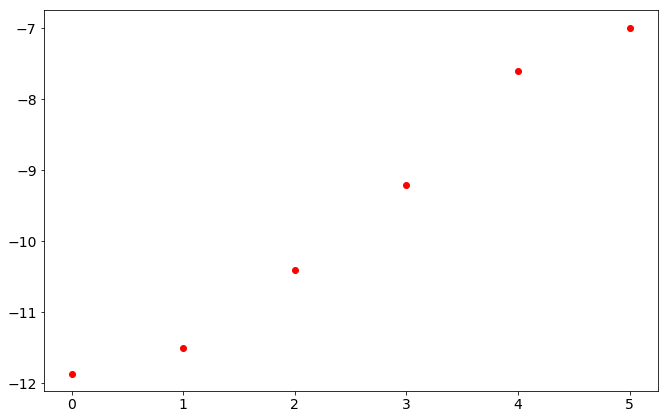

In [335]:
plt.plot(np.log(sim_CTAB_on_AU_111_bulk_concentrations_of_interest),'ro')

In [336]:
sim_CTAB_on_AU_111_monolayer_density_from_logc = scipy.interpolate.interp1d(
    np.log(exp_kawasaki2007influence_fig1b_data["c"]),
    exp_kawasaki2007influence_fig1b_data["A"], 
    axis=0, kind='linear')
sim_CTAB_on_AU_111_monolayer_density_from_c = lambda c: sim_CTAB_on_AU_111_monolayer_density_from_logc( np.log(c) )

In [337]:
sim_CTAB_on_AU_111_area_per_monolayer_molecule = \
    sim_CTAB_on_AU_111_monolayer_density_from_c( sim_CTAB_on_AU_111_bulk_concentrations_of_interest )

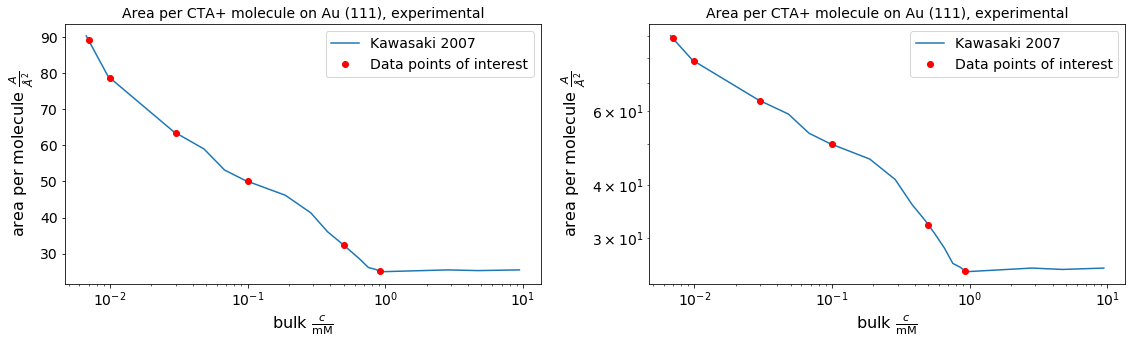

In [338]:
rows = 1
cols = 2

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)

#p = next(pos)
_, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
                   title = "Area per CTA+ molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
#ax.set_xscale("log")
_, _ = addSubplot(sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
                   sim_CTAB_on_AU_111_area_per_monolayer_molecule / C.angstrom**2,
                   legend = "Data points of interest", ax = ax, pos = p, fmtstr='ro')
ax.set_xscale("log")

p = next(pos)

#p = next(pos)
_, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
                   title = "Area per CTA+ molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
#ax.set_xscale("log")
_, _ = addSubplot(sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
                   sim_CTAB_on_AU_111_area_per_monolayer_molecule / C.angstrom**2,
                   legend = "Data points of interest", ax = ax, pos = p, fmtstr='ro')
ax.set_yscale("log")
ax.set_xscale("log")


fig.tight_layout()

In [339]:
sim_CTAB_on_AU_111_template

{'box': [array([6.05577e-09, 5.99376e-09, 1.80000e-08]),
  array([8.65110e-09, 8.99064e-09, 1.80000e-08]),
  array([1.816731e-08, 1.798128e-08, 1.800000e-08]),
  array([2.076264e-08, 2.097816e-08, 1.800000e-08])],
 'ci_initial_placement': 'random',
 'counterion': 'BR',
 'pbc': 111,
 'pressure': 1,
 'sb_crystal_plane': 111,
 'sb_multiples': [array([21, 12,  2]),
  array([30, 18,  2]),
  array([63, 36,  2]),
  array([72, 42,  2])],
 'sb_unit_cell': [array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10]),
  array([2.8837e-10, 4.9948e-10, 7.0637e-10])],
 'sf_preassembly': 'bilayer',
 'solvent': 'H2O',
 'substrate': 'AU',
 'surfactant': 'CTAB',
 'sv_density': 997.0,
 'sv_preassembly': 'random',
 'temperature': 298}

In [340]:
sim_CTAB_on_AU_111_template_df = pd.DataFrame(
    #columns=columns_simulation_properties, 
    data=sim_CTAB_on_AU_111_template)

In [341]:
sim_CTAB_on_AU_111_bulk_concentrations_of_interest_sr = pd.Series(sim_CTAB_on_AU_111_bulk_concentrations_of_interest,
                                                                  name="sf_concentration")

In [342]:
sim_CTAB_on_AU_111_bulk_concentrations_of_interest_sr

0    0.000007
1    0.000010
2    0.000030
3    0.000100
4    0.000500
5    0.000920
Name: sf_concentration, dtype: float64

In [343]:
sim_CTAB_on_AU_111_df = df_crossjoin(sim_CTAB_on_AU_111_template_df,
                                     pd.DataFrame(sim_CTAB_on_AU_111_bulk_concentrations_of_interest_sr))

In [344]:
sim_CTAB_on_AU_111_df[["sf_concentration","box"]]

,sf_concentration,box
0,0.000007,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
1,0.000010,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
2,0.000030,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
3,0.000100,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
4,0.000500,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
5,0.000920,"[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
6,0.000007,"[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
7,0.000010,"[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
8,0.000030,"[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
9,0.000100,"[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"


In [345]:
# surface area in m
sim_CTAB_on_AU_111_df["sb_measures"] = sim_CTAB_on_AU_111_df["sb_multiples"] * sim_CTAB_on_AU_111_df["sb_unit_cell"]

In [346]:
sim_CTAB_on_AU_111_df[["sb_measures","box"]]

,sb_measures,box
0,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
1,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
2,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
3,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
4,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
5,"[6.05577e-09, 5.99376e-09, 1.41274e-09]","[6.05577e-09, 5.99376e-09, 1.8000000000000002e..."
6,"[8.6511e-09, 8.99064e-09, 1.41274e-09]","[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
7,"[8.6511e-09, 8.99064e-09, 1.41274e-09]","[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
8,"[8.6511e-09, 8.99064e-09, 1.41274e-09]","[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"
9,"[8.6511e-09, 8.99064e-09, 1.41274e-09]","[8.6511e-09, 8.99064e-09, 1.8000000000000002e-08]"


In [347]:
sim_CTAB_on_AU_111_df["sb_normal"] = 2 # surface normal 0,1 or 3 for x,y or z

In [348]:
sim_CTAB_on_AU_111_df[["sb_volume"]] = sim_CTAB_on_AU_111_df[["sb_measures"]].applymap(np.prod)

In [349]:
sim_CTAB_on_AU_111_df[["sb_measures"]]

,sb_measures
0,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
1,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
2,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
3,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
4,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
5,"[6.05577e-09, 5.99376e-09, 1.41274e-09]"
6,"[8.6511e-09, 8.99064e-09, 1.41274e-09]"
7,"[8.6511e-09, 8.99064e-09, 1.41274e-09]"
8,"[8.6511e-09, 8.99064e-09, 1.41274e-09]"
9,"[8.6511e-09, 8.99064e-09, 1.41274e-09]"


In [350]:
# select component of array in column "sb_measures" based upon index stored in "sb_normal"
sim_CTAB_on_AU_111_df["sb_thickness"] = sim_CTAB_on_AU_111_df[["sb_measures","sb_normal"]].apply(
    lambda r: r["sb_measures"][r["sb_normal"]] ,raw=True,axis=1)

In [351]:
sim_CTAB_on_AU_111_df["sb_area"] = sim_CTAB_on_AU_111_df["sb_volume"] / sim_CTAB_on_AU_111_df["sb_thickness"]

In [352]:
sim_CTAB_on_AU_111_df["sb_area_per_sf_molecule"] = \
    sim_CTAB_on_AU_111_monolayer_density_from_c( sim_CTAB_on_AU_111_df["sf_concentration"] )

In [353]:
sim_CTAB_on_AU_111_df[["sb_area_per_sf_molecule"]]*1e20

,sb_area_per_sf_molecule
0,89.058554
1,78.663289
2,63.470638
3,50.035575
4,32.329975
5,25.167867
6,89.058554
7,78.663289
8,63.470638
9,50.035575


In [354]:
sim_CTAB_on_AU_111_df["sb_circular_area_per_sf_molecule_radius"] = \
    np.sqrt(sim_CTAB_on_AU_111_df["sb_area_per_sf_molecule"])/np.pi

In [355]:
sim_CTAB_on_AU_111_df["sb_square_area_per_sf_molecule_side"] = \
    np.sqrt(sim_CTAB_on_AU_111_df["sb_area_per_sf_molecule"])

In [356]:
sim_CTAB_on_AU_111_df["sf_nmolecules"] = \
    np.round(sim_CTAB_on_AU_111_df["sb_area"] / sim_CTAB_on_AU_111_df["sb_area_per_sf_molecule"]).astype(int)

In [357]:
sim_CTAB_on_AU_111_df[["sf_nmolecules",
                       "sb_area_per_sf_molecule",
                       "sb_circular_area_per_sf_molecule_radius",
                       "sb_square_area_per_sf_molecule_side"]]

,sf_nmolecules,sb_area_per_sf_molecule,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side
0,41,8.905855e-19,3.003917e-10,9.437084e-10
1,46,7.866329e-19,2.823164e-10,8.869233e-10
2,57,6.347064e-19,2.535926e-10,7.966846e-10
3,73,5.003557e-19,2.251591e-10,7.073583e-10
4,112,3.232998e-19,1.809893e-10,5.685945e-10
5,144,2.516787e-19,1.596884e-10,5.016759e-10
6,87,8.905855e-19,3.003917e-10,9.437084e-10
7,99,7.866329e-19,2.823164e-10,8.869233e-10
8,123,6.347064e-19,2.535926e-10,7.966846e-10
9,155,5.003557e-19,2.251591e-10,7.073583e-10


In [358]:
sim_CTAB_on_AU_111_df[["sf_concentration", "sb_multiples","sf_nmolecules"]]

,sf_concentration,sb_multiples,sf_nmolecules
0,0.000007,"[21, 12, 2]",41
1,0.000010,"[21, 12, 2]",46
2,0.000030,"[21, 12, 2]",57
3,0.000100,"[21, 12, 2]",73
4,0.000500,"[21, 12, 2]",112
5,0.000920,"[21, 12, 2]",144
6,0.000007,"[30, 18, 2]",87
7,0.000010,"[30, 18, 2]",99
8,0.000030,"[30, 18, 2]",123
9,0.000100,"[30, 18, 2]",155


#### Substrate slab IDs

In [359]:
template_substrate_name = "{substrate:s}_{plane:03d}_{multiples[0]:d}x{multiples[1]:d}x{multiples[2]:d}"
# substrtae slabs are identified by unique names such as
# AU_111_2x3x4 for a 111 gold slab with 2, 3, and 4 multiples 
# of the underlying unit cell in each spatial direction respectively
sim_CTAB_on_AU_111_df["sb_name"] = sim_CTAB_on_AU_111_df.apply(
    lambda r: template_substrate_name.format(substrate=r["substrate"],
                                                plane=r["sb_crystal_plane"],
                                                multiples=r["sb_multiples"])
                                                ,axis=1)

#### Duplicate system sets and apply tiny modifications

In [360]:
sim_CTAB_on_AU_111_duplicated_df = sim_CTAB_on_AU_111_df.copy()

In [361]:
# here system with prearranged counterions
sim_CTAB_on_AU_111_duplicated_df['sf_preassembly'] += '_with_counterion'

In [362]:
sim_CTAB_on_AU_111_df = pd.concat([sim_CTAB_on_AU_111_df,sim_CTAB_on_AU_111_duplicated_df], 
          ignore_index=True)

In [363]:
sim_CTAB_on_AU_111_df.loc[
  sim_CTAB_on_AU_111_df["sf_preassembly"] == 'bilayer_with_counterion',
    "ci_initial_placement"] = "at_polar_head"

In [364]:
sim_CTAB_on_AU_111_df["sb_name"].unique()

array(['AU_111_21x12x2', 'AU_111_30x18x2', 'AU_111_63x36x2',
       'AU_111_72x42x2'], dtype=object)

In [365]:
# select only surface of area able to fit 3 hemicylindrical aggregates
sim_CTAB_on_AU_111_subset_df = sim_CTAB_on_AU_111_df[
    (sim_CTAB_on_AU_111_df["sb_name"] == 'AU_111_63x36x2') & \
    (sim_CTAB_on_AU_111_df["ci_initial_placement"] == 'at_polar_head')].copy()

In [366]:
sim_CTAB_on_AU_111_subset_df["sf_nmolecules"]

36     367
37     415
38     515
39     653
40    1010
41    1298
Name: sf_nmolecules, dtype: int64

In [367]:
sf_preassemply_list = [
    "monolayer_with_counterion", 
    "inverse_monolayer_with_counterion",
    #"inverse_bilayer_with_counterion", 
    "cylinders_with_counterion",
    "hemicylinders_with_counterion"]

In [368]:
sim_CTAB_on_AU_111_subset_df_list = [ 
    sim_CTAB_on_AU_111_subset_df.copy() for i in range(len(sf_preassemply_list))]

In [369]:
for n in range(len(sf_preassemply_list)):
    sim_CTAB_on_AU_111_subset_df_list[n]["sf_preassembly"] = sf_preassemply_list[n]

In [370]:
sim_CTAB_on_AU_111_extension_df = pd.concat(sim_CTAB_on_AU_111_subset_df_list,ignore_index=True)

In [371]:
sim_CTAB_on_AU_111_extension_df

,box,ci_initial_placement,counterion,pbc,pressure,sb_crystal_plane,sb_multiples,sb_unit_cell,sf_preassembly,solvent,...,sb_measures,sb_normal,sb_volume,sb_thickness,sb_area,sb_area_per_sf_molecule,sb_circular_area_per_sf_molecule_radius,sb_square_area_per_sf_molecule_side,sf_nmolecules,sb_name
0,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,8.905855e-19,3.003917e-10,9.437084e-10,367,AU_111_63x36x2
1,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,7.866329e-19,2.823164e-10,8.869233e-10,415,AU_111_63x36x2
2,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,6.347064e-19,2.535926e-10,7.966846e-10,515,AU_111_63x36x2
3,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,5.003557e-19,2.251591e-10,7.073583e-10,653,AU_111_63x36x2
4,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,3.232998e-19,1.809893e-10,5.685945e-10,1010,AU_111_63x36x2
5,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,2.516787e-19,1.596884e-10,5.016759e-10,1298,AU_111_63x36x2
6,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,8.905855e-19,3.003917e-10,9.437084e-10,367,AU_111_63x36x2
7,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,7.866329e-19,2.823164e-10,8.869233e-10,415,AU_111_63x36x2
8,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,6.347064e-19,2.535926e-10,7.966846e-10,515,AU_111_63x36x2
9,"[1.816731e-08, 1.798128e-08, 1.800000000000000...",at_polar_head,BR,111,1,111,"[63, 36, 2]","[2.8837e-10, 4.9948e-10, 7.0637e-10]",inverse_monolayer_with_counterion,H2O,...,"[1.816731e-08, 1.798128e-08, 1.41274e-09]",2,4.615019e-25,1.412740e-09,3.266715e-16,5.003557e-19,2.251591e-10,7.073583e-10,653,AU_111_63x36x2


#### Unique system names

In [372]:
sim_CTAB_on_AU_111_df = pd.concat(
    [sim_CTAB_on_AU_111_df, sim_CTAB_on_AU_111_extension_df],
    ignore_index=True)

In [373]:
# construct unique system names:
template_system_name = "{sfN:d}_{surfactant:s}_on_{substrate:s}_{suffix:s}"
# sim_CTAB_on_AU_111_df["system_name"] = 
sim_CTAB_on_AU_111_df["system_name"] = sim_CTAB_on_AU_111_df.apply( 
    lambda r: template_system_name.format(sfN=r["sf_nmolecules"],
                                          surfactant=r["surfactant"],
                                          substrate=r["sb_name"],
                                          suffix=r["sf_preassembly"]), axis=1)

In [374]:
sim_CTAB_on_AU_111_df[['sb_are_per_molecule']]

KeyError: "['sb_are_per_molecule'] not in index"

#### Expected adsorption

In [375]:
sim_CTAB_on_AU_111_df.columns

Index(['box', 'ci_initial_placement', 'counterion', 'pbc', 'pressure',
       'sb_crystal_plane', 'sb_multiples', 'sb_unit_cell', 'sf_preassembly',
       'solvent', 'substrate', 'surfactant', 'sv_density', 'sv_preassembly',
       'temperature', 'sf_concentration', 'sb_measures', 'sb_normal',
       'sb_volume', 'sb_thickness', 'sb_area', 'sb_area_per_sf_molecule',
       'sb_circular_area_per_sf_molecule_radius',
       'sb_square_area_per_sf_molecule_side', 'sf_nmolecules', 'sb_name',
       'system_name'],
      dtype='object')

In [376]:
C.nano * C.gram

1.0000000000000002e-12

In [377]:
M_CTAp / (C.Avogadro  * C.nano * C.gram)

4.725097050316304e-13

In [378]:
CTAp_area_number_density_in_SI_units_to_ng_per_square_cm = \
    C.centi** 2 * M_CTAp / (C.Avogadro  * C.nano * C.gram) 

In [379]:
expected_adsorption_aggregate_shapes = { # ng cm^-2
    "bilayer-like": [
        '>', 180 / CTAp_area_number_density_in_SI_units_to_ng_per_square_cm],
    "intermmediate": [
        '<', 180 / CTAp_area_number_density_in_SI_units_to_ng_per_square_cm],
    "monolayer-like": [
        '<', 70 / CTAp_area_number_density_in_SI_units_to_ng_per_square_cm]
}

In [380]:
expected_adsorption_aggregate_shapes

{'bilayer-like': ['>', 3.8094455644662487e+18],
 'intermmediate': ['<', 3.8094455644662487e+18],
 'monolayer-like': ['<', 1.4814510528479857e+18]}

In [381]:
for shape, criterion in expected_adsorption_aggregate_shapes.items():
    if criterion[0] == '<':
        selection = (sim_CTAB_on_AU_111_df["sf_nmolecules"] / \
            sim_CTAB_on_AU_111_df["sb_area"]) < criterion[1]
    else:
        selection = (sim_CTAB_on_AU_111_df["sf_nmolecules"] / \
            sim_CTAB_on_AU_111_df["sb_area"]) > criterion[1]
    sim_CTAB_on_AU_111_df.loc[selection,"sf_expected_aggregates"] = shape

In [383]:
sim_CTAB_on_AU_111_df["sb_name"].unique()

array(['AU_111_21x12x2', 'AU_111_30x18x2', 'AU_111_63x36x2',
       'AU_111_72x42x2'], dtype=object)

In [384]:
sim_CTAB_on_AU_111_df[sim_CTAB_on_AU_111_df["sb_name"] == 'AU_111_63x36x2'][["system_name","sf_expected_aggregates"]]

,system_name,sf_expected_aggregates
12,367_CTAB_on_AU_111_63x36x2_bilayer,monolayer-like
13,415_CTAB_on_AU_111_63x36x2_bilayer,monolayer-like
14,515_CTAB_on_AU_111_63x36x2_bilayer,intermmediate
15,653_CTAB_on_AU_111_63x36x2_bilayer,intermmediate
16,1010_CTAB_on_AU_111_63x36x2_bilayer,intermmediate
17,1298_CTAB_on_AU_111_63x36x2_bilayer,bilayer-like
36,367_CTAB_on_AU_111_63x36x2_bilayer_with_counte...,monolayer-like
37,415_CTAB_on_AU_111_63x36x2_bilayer_with_counte...,monolayer-like
38,515_CTAB_on_AU_111_63x36x2_bilayer_with_counte...,intermmediate
39,653_CTAB_on_AU_111_63x36x2_bilayer_with_counte...,intermmediate


#### Store to file

In [710]:
len(sim_CTAB_on_AU_111_df)

72

In [645]:
prefix = %pwd

In [646]:
prefix

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants'

In [156]:
%mkdir data

In [215]:
# csv_CTAB_on_AU_111 = prefix + os.sep + 'data/CTAB_on_AU_111.csv'

In [216]:
# csv_CTAB_on_AU_111

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants/data/CTAB_on_AU_111.csv'

In [217]:
# %store csv_CTAB_on_AU_111

Stored 'csv_CTAB_on_AU_111' (str)


In [218]:
# %store sim_CTAB_on_AU_111_df

Stored 'sim_CTAB_on_AU_111_df' (DataFrame)


In [219]:
# sim_CTAB_on_AU_111_df[["sf_nmolecules","sb_multiples","box",
#                        "sb_area_per_sf_molecule","sf_concentration"]].to_csv(
#                         csv_CTAB_on_AU_111, sep=';')

In [647]:
pkl_CTAB_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + 'CTAB_on_AU_111.pkl'

In [169]:
json_CTAB_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + 'CTAB_on_AU_111.json'

In [170]:
hdf5_CTAB_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + '/CTAB_on_AU_111.h5'

In [648]:
sim_CTAB_on_AU_111_df.to_pickle(pkl_CTAB_on_AU_111)

In [172]:
sim_CTAB_on_AU_111_df.to_json(json_CTAB_on_AU_111)

In [173]:
sim_CTAB_on_AU_111_df.to_hdf(hdf5_CTAB_on_AU_111,'df')

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['box', 'ci_initial_placement', 'counterion', 'sb_multiples', 'sb_unit_cell', 'sf_preassembly', 'solvent', 'substrate', 'surfactant', 'sv_preassembly', 'sb_measures', 'sb_name', 'system_name']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


### with indenter

In [388]:
indenter = {
    "100Ang_stepped" :   "100Ang_stepped.pdb", 
    "50Ang_stepped":     "50Ang_stepped.pdb", 
    "30Ang_stepped":     "30Ang_stepped.pdb",
    "15Ang_stepped": "15Ang_stepped.pdb" }

In [389]:
sim_df = pd.concat( [ sim_SDS_on_AU_111_df, sim_CTAB_on_AU_111_df ] )

In [390]:
# select systems of interest
sim_selection_df = sim_df[ 
    (   # SDS system selection
        (sim_df.surfactant == 'SDS') & \
        (sim_df.ci_initial_placement == 'at_polar_head') & \
        (sim_df.sf_preassembly != 'inverse_bilayer_with_counterion') & \
        (sim_df.sb_name == 'AU_111_51x30x2') & \
        (sim_df.sf_nmolecules > 0) ) | \
        # CTAB system selection
        ( (sim_df.surfactant == 'CTAB') & \
        (sim_df.ci_initial_placement == 'at_polar_head') & \
        (sim_df.sf_preassembly != 'inverse_bilayer_with_counterion') & \
        (sim_df.sb_name == 'AU_111_63x36x2') & \
        (sim_df.sf_nmolecules > 0) )
].copy()

In [391]:
sim_selection_df

,box,ci_initial_placement,counterion,pbc,pressure,sb_area,sb_area_per_sf_molecule,sb_circular_area_per_sf_molecule_radius,sb_crystal_plane,sb_measures,...,sf_expected_aggregates,sf_nmolecules,sf_preassembly,solvent,substrate,surfactant,sv_density,sv_preassembly,system_name,temperature
42,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,9.955720e-20,1.004353e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,2214,bilayer_with_counterion,H2O,AU,SDS,997.0,random,2214_SDS_on_AU_111_51x30x2_bilayer_with_counte...,298
43,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,1.991144e-19,1.420370e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,1107,bilayer_with_counterion,H2O,AU,SDS,997.0,random,1107_SDS_on_AU_111_51x30x2_bilayer_with_counte...,298
44,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,3.410067e-19,1.858795e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,646,bilayer_with_counterion,H2O,AU,SDS,997.0,random,646_SDS_on_AU_111_51x30x2_bilayer_with_counterion,298
45,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,5.840138e-19,2.432549e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,377,bilayer_with_counterion,H2O,AU,SDS,997.0,random,377_SDS_on_AU_111_51x30x2_bilayer_with_counterion,298
46,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,1.000192e-18,3.183404e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,220,bilayer_with_counterion,H2O,AU,SDS,997.0,random,220_SDS_on_AU_111_51x30x2_bilayer_with_counterion,298
47,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,1.712945e-18,4.166025e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,129,bilayer_with_counterion,H2O,AU,SDS,997.0,random,129_SDS_on_AU_111_51x30x2_bilayer_with_counterion,298
48,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,2.933619e-18,5.451951e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,75,bilayer_with_counterion,H2O,AU,SDS,997.0,random,75_SDS_on_AU_111_51x30x2_bilayer_with_counterion,298
56,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,9.955720e-20,1.004353e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,2214,monolayer_with_counterion,H2O,AU,SDS,997.0,random,2214_SDS_on_AU_111_51x30x2_monolayer_with_coun...,298
57,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,1.991144e-19,1.420370e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,1107,monolayer_with_counterion,H2O,AU,SDS,997.0,random,1107_SDS_on_AU_111_51x30x2_monolayer_with_coun...,298
58,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,111,1,2.203736e-16,3.410067e-19,1.858795e-10,111,"[1.470687e-08, 1.49844e-08, 1.41274e-09]",...,NaN,646,monolayer_with_counterion,H2O,AU,SDS,997.0,random,646_SDS_on_AU_111_51x30x2_monolayer_with_count...,298


In [392]:
indenter_of_choice = '50Ang_stepped'

In [393]:
indenter[indenter_of_choice]

'50Ang_stepped.pdb'

In [394]:
sim_selection_df['system_name'] = (
    sim_selection_df['system_name'] +  '_' + indenter_of_choice)

In [395]:
sim_selection_df['indenter'] = indenter_of_choice
sim_selection_df['indenter_pdb'] = indenter[indenter_of_choice]

In [396]:
sim_df = pd.concat([sim_df,sim_selection_df])

In [397]:
sim_df[ sim_df['indenter'] == indenter_of_choice ]

,box,ci_initial_placement,counterion,indenter,indenter_pdb,pbc,pressure,sb_area,sb_area_per_sf_molecule,sb_circular_area_per_sf_molecule_radius,...,sf_expected_aggregates,sf_nmolecules,sf_preassembly,solvent,substrate,surfactant,sv_density,sv_preassembly,system_name,temperature
42,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,9.955720e-20,1.004353e-10,...,NaN,2214,bilayer_with_counterion,H2O,AU,SDS,997.0,random,2214_SDS_on_AU_111_51x30x2_bilayer_with_counte...,298
43,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,1.991144e-19,1.420370e-10,...,NaN,1107,bilayer_with_counterion,H2O,AU,SDS,997.0,random,1107_SDS_on_AU_111_51x30x2_bilayer_with_counte...,298
44,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,3.410067e-19,1.858795e-10,...,NaN,646,bilayer_with_counterion,H2O,AU,SDS,997.0,random,646_SDS_on_AU_111_51x30x2_bilayer_with_counter...,298
45,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,5.840138e-19,2.432549e-10,...,NaN,377,bilayer_with_counterion,H2O,AU,SDS,997.0,random,377_SDS_on_AU_111_51x30x2_bilayer_with_counter...,298
46,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,1.000192e-18,3.183404e-10,...,NaN,220,bilayer_with_counterion,H2O,AU,SDS,997.0,random,220_SDS_on_AU_111_51x30x2_bilayer_with_counter...,298
47,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,1.712945e-18,4.166025e-10,...,NaN,129,bilayer_with_counterion,H2O,AU,SDS,997.0,random,129_SDS_on_AU_111_51x30x2_bilayer_with_counter...,298
48,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,2.933619e-18,5.451951e-10,...,NaN,75,bilayer_with_counterion,H2O,AU,SDS,997.0,random,75_SDS_on_AU_111_51x30x2_bilayer_with_counteri...,298
56,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,9.955720e-20,1.004353e-10,...,NaN,2214,monolayer_with_counterion,H2O,AU,SDS,997.0,random,2214_SDS_on_AU_111_51x30x2_monolayer_with_coun...,298
57,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,1.991144e-19,1.420370e-10,...,NaN,1107,monolayer_with_counterion,H2O,AU,SDS,997.0,random,1107_SDS_on_AU_111_51x30x2_monolayer_with_coun...,298
58,"[1.470687e-08, 1.49844e-08, 1.8000000000000002...",at_polar_head,NA,50Ang_stepped,50Ang_stepped.pdb,111,1,2.203736e-16,3.410067e-19,1.858795e-10,...,NaN,646,monolayer_with_counterion,H2O,AU,SDS,997.0,random,646_SDS_on_AU_111_51x30x2_monolayer_with_count...,298


#### store to file

In [785]:
sim_df.set_index('system_name',inplace=True)

In [786]:
pkl_surfactant_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + 'surfactant_on_AU_111.pkl'

In [787]:
pkl_surfactant_on_AU_111

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants/data/surfactant_on_AU_111.pkl'

In [788]:
json_surfactant_on_AU_111 = prefix + os.sep + 'data' \
    + os.sep + 'surfactant_on_AU_111.json'

In [789]:
json_surfactant_on_AU_111

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants/data/surfactant_on_AU_111.json'

In [793]:
sim_df.to_pickle(pkl_surfactant_on_AU_111, compression=None)

In [797]:
sim_df.to_json(json_surfactant_on_AU_111, orient='index')

In [761]:
fp   = FilePad(
            host='localhost',
            port=21182,
            database='fireworks',
            username='fireworks',
            password='japanese1')

In [798]:
fp_id = 'surfactant_on_AU_111_df_json'

In [799]:
content, doc = fp.get_file(identifier=fp_id)

In [800]:
fp.delete_file(identifier=fp_id)

2018-09-17 20:16:19,466 WARNING The file doesn't exist


In [ ]:
if doc is not None:
    fp.delete_file(identifier=fp_id)

In [771]:
from datetime import datetime

In [801]:
str(datetime.now())

'2018-09-17 20:16:22.769723'

In [802]:
fp.add_file(json_surfactant_on_AU_111, identifier=fp_id, metadata={
    'updated_on': str(datetime.now())
})

('5b9fef812512e1e2934cb487', 'surfactant_on_AU_111_df_json')

## Poster Plot

In [399]:
sim_df[ sim_df["sb_name"] == "AU_111_63x36x2"][["box"]] / C.nano

,box
12,"[18.167309999999997, 17.981279999999998, 18.0]"
13,"[18.167309999999997, 17.981279999999998, 18.0]"
14,"[18.167309999999997, 17.981279999999998, 18.0]"
15,"[18.167309999999997, 17.981279999999998, 18.0]"
16,"[18.167309999999997, 17.981279999999998, 18.0]"
17,"[18.167309999999997, 17.981279999999998, 18.0]"
36,"[18.167309999999997, 17.981279999999998, 18.0]"
37,"[18.167309999999997, 17.981279999999998, 18.0]"
38,"[18.167309999999997, 17.981279999999998, 18.0]"
39,"[18.167309999999997, 17.981279999999998, 18.0]"


In [1023]:
18*18*4

1296

In [400]:
sim_CTAB_on_AU_111_monolayer_density_from_logc = scipy.interpolate.interp1d(
    np.log(exp_kawasaki2007influence_fig1b_data["c"]),
    exp_kawasaki2007influence_fig1b_data["A"], 
    axis=0, kind='linear')
sim_CTAB_on_AU_111_monolayer_density_from_c = lambda c: sim_CTAB_on_AU_111_monolayer_density_from_logc( np.log(c) )

In [401]:
sim_CTAB_on_AU_111_area_per_monolayer_molecule = \
    sim_CTAB_on_AU_111_monolayer_density_from_c( sim_CTAB_on_AU_111_bulk_concentrations_of_interest )

In [404]:
pos

<generator object subplotPosition at 0x7ffb86746468>

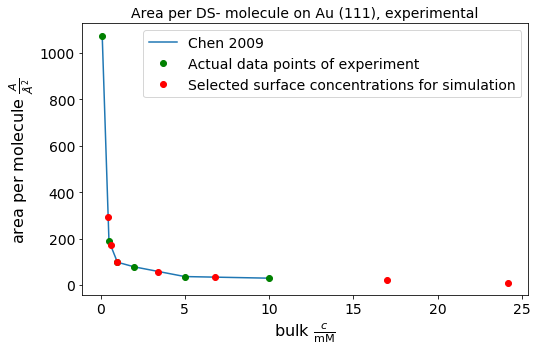

In [405]:
rows = 1
cols = 1

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   title = "Area per DS- molecule on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Chen 2009", fig = fig, pos = p)
_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["A"]] / C.angstrom**2,
                   legend = "Actual data points of experiment",
                   fmtstr='go', fig = fig, pos = p, ax = ax)
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area( 
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest) / C.milli,
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest / C.angstrom**2,
                   legend = "Selected surface concentrations for simulation",
                   fmtstr='ro', fig = fig, pos = p, ax = ax)

In [406]:
exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area_for_poster_plot = \
    scipy.interpolate.interp1d(
        exp_sklt_unpublished_fig1_data["A"],
        exp_sklt_unpublished_fig1_data["c"], 
        axis=0, kind='linear', bounds_error=False,
        fill_value="extrapolate")

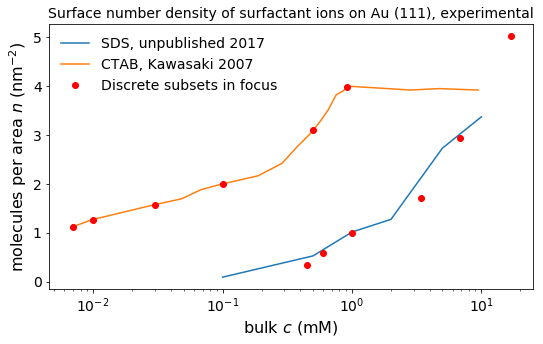

In [409]:
rows = 1
cols = 1

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   title = "Surface number density of surfactant ions on Au (111), experimental", 
                   xlabel = r'bulk $c \ (\mathrm{mM})$', 
                   ylabel = r'molecules per area $n \ (\mathrm{nm}^{-2})$',
                   legend = "SDS, unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area_for_poster_plot(
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest ) [1:] / C.milli,     
    1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[1:] * C.nano**2,
            fmtstr='ro', fig = fig, pos = p, ax = ax )

_, _ = addSubplot( 
    exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
    exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
    legend = "CTAB, Kawasaki 2007", fig = fig, pos = p, ax = ax )

_, _ = addSubplot( 
    sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
    fmtstr='ro', fig = fig, pos = p, ax = ax,
    legend = "Discrete subsets in focus")

ax.legend(frameon=False)
ax.set_xscale("log")
fig.tight_layout()

In [410]:
minor_x_ticks = np.log10( ax.get_xticks(minor=True) )

In [411]:
minor_x_ticks

array([-3.69897   , -3.52287875, -3.39794001, -3.30103   , -3.22184875,
       -3.15490196, -3.09691001, -3.04575749, -2.69897   , -2.52287875,
       -2.39794001, -2.30103   , -2.22184875, -2.15490196, -2.09691001,
       -2.04575749, -1.69897   , -1.52287875, -1.39794001, -1.30103   ,
       -1.22184875, -1.15490196, -1.09691001, -1.04575749, -0.69897   ,
       -0.52287875, -0.39794001, -0.30103   , -0.22184875, -0.15490196,
       -0.09691001, -0.04575749,  0.30103   ,  0.47712125,  0.60205999,
        0.69897   ,  0.77815125,  0.84509804,  0.90308999,  0.95424251,
        1.30103   ,  1.47712125,  1.60205999,  1.69897   ,  1.77815125,
        1.84509804,  1.90308999,  1.95424251,  2.30103   ,  2.47712125,
        2.60205999,  2.69897   ,  2.77815125,  2.84509804,  2.90308999,
        2.95424251,  3.30103   ,  3.47712125,  3.60205999,  3.69897   ,
        3.77815125,  3.84509804,  3.90308999,  3.95424251])

In [412]:
major_x_ticks = np.log10( ax.get_xticks() )

In [413]:
major_x_ticks

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.])

In [414]:
exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area = \
    scipy.interpolate.interp1d(
        exp_sklt_unpublished_fig1_data["A"],
        np.log10( exp_sklt_unpublished_fig1_data["c"] / C.milli), 
        axis=0, kind='slinear', bounds_error=False,
        fill_value="extrapolate")

In [415]:
wanted_minor_x_ticks = minor_x_ticks[ (minor_x_ticks > -3.0) & (minor_x_ticks < 2.0) ]

In [416]:
wanted_major_x_ticks = major_x_ticks[ (major_x_ticks >= -2.0) & (major_x_ticks <= 1.9) ]

In [417]:
x_ticks_labels = [ '$10^{{{:.0f}}}$'.format(xval) for xval in wanted_major_x_ticks ]

In [418]:
x_ticks_labels

['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$']

In [419]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['font.serif'] = ['Arial']
mpl.rcParams['font.cursive'] = ['Arial']
mpl.rcParams['font.size'] = '10'
mpl.rcParams['legend.fontsize'] = '10'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['svg.fonttype'] = 'none'

In [420]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (16,10) # the standard figure size

In [421]:
plt.rcParams["lines.linewidth"] = 4

In [422]:
plt.rcParams["lines.markersize"] = 14

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


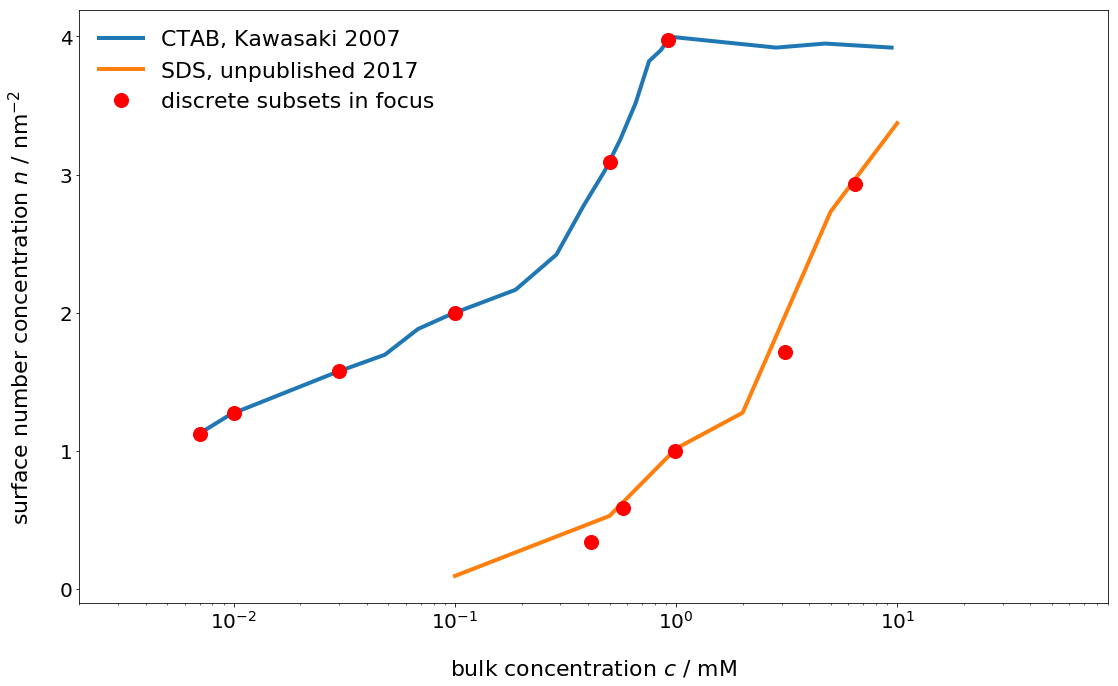

In [423]:
rows = 1
cols = 1

fig = plt.figure(figsize=(16*cols, 10*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot( np.log10( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli ),
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "CTAB, Kawasaki 2007", fig = fig, pos = p)
_, _ = addSubplot( np.log10( sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli ),
                    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
                    fmtstr='ro', fig = fig, pos = p, ax = ax )
_, _ = addSubplot(
    np.log10( exp_sklt_unpublished_fig1_data[["c"]] / C.milli ),
            exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
            #title = "Surface number density of surfactant ions on Au (111), experimental", 
            legend = "SDS, unpublished 2017", fig = fig, pos = p, ax = ax ) 
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area(
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest )[2:],     
    1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[2:] * C.nano**2,
            fmtstr='ro', fig = fig, pos = p, ax = ax,
            legend = "discrete subsets in focus")


ax.legend(frameon=False, loc='upper left')
ax.set_yticks(np.arange(0,5,dtype=int))
ax.set_xticks(wanted_minor_x_ticks, minor=True)
ax.set_xticks(wanted_major_x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels)
# ax.set_xscale("log")
ax.set_xlabel(r'bulk concentration $ c \ / \ \mathrm{mM}$', labelpad=BIGGER_SIZE)
ax.set_ylabel(r'surface number concentration $ n \ / \ {\mathrm{nm}^{-2}}$',labelpad=BIGGER_SIZE)
fig.tight_layout()


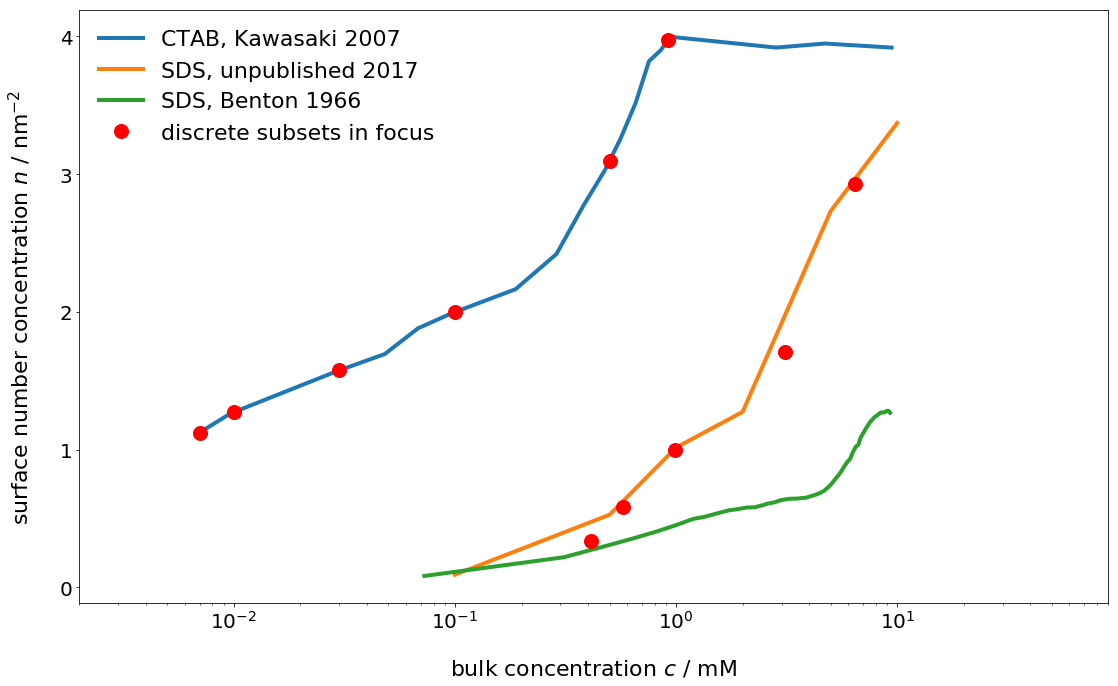

In [435]:
# with Benton 1966
rows = 1
cols = 1

fig = plt.figure(figsize=(16*cols, 10*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot( np.log10( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli ),
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "CTAB, Kawasaki 2007", fig = fig, pos = p)
_, _ = addSubplot( np.log10( sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli ),
                    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
                    fmtstr='ro', fig = fig, pos = p, ax = ax )
_, _ = addSubplot(
    np.log10( exp_sklt_unpublished_fig1_data[["c"]] / C.milli ),
            exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
            #title = "Surface number density of surfactant ions on Au (111), experimental", 
            legend = "SDS, unpublished 2017", fig = fig, pos = p, ax = ax ) 
_, _ = addSubplot(
    np.log10( exp_benton1966_fig1_sds_fit_data[["c"]] / C.milli ),
            exp_benton1966_fig1_sds_fit_data[["GammaN"]] * C.nano**2,
            legend = "SDS, Benton 1966", fig = fig, pos = p, ax = ax ) 
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area(
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest )[2:],     
    1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[2:] * C.nano**2,
            fmtstr='ro', fig = fig, pos = p, ax = ax,
            legend = "discrete subsets in focus")


ax.legend(frameon=False, loc='upper left')
ax.set_yticks(np.arange(0,5,dtype=int))
ax.set_xticks(wanted_minor_x_ticks, minor=True)
ax.set_xticks(wanted_major_x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels)
# ax.set_xscale("log")
ax.set_xlabel(r'bulk concentration $ c \ / \ \mathrm{mM}$', labelpad=BIGGER_SIZE)
ax.set_ylabel(r'surface number concentration $ n \ / \ {\mathrm{nm}^{-2}}$',labelpad=BIGGER_SIZE)
fig.tight_layout()


In [989]:
os.getcwd()

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants'

In [990]:
os.mkdir('fig')

In [991]:
fig.savefig('fig/20180927_concentrations_in_focus.png')

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [1008]:
wanted_minor_x_ticks = minor_x_ticks[ (minor_x_ticks > -3.0) & (minor_x_ticks <= 1.0) ]

In [1009]:
wanted_major_x_ticks = major_x_ticks[ (major_x_ticks >= -2.0) & (major_x_ticks <= 1.9) ]

In [1010]:
x_ticks_labels = [ '$10^{{{:.0f}}}$'.format(xval) for xval in wanted_major_x_ticks ]

In [1011]:
x_ticks_labels

['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$']

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


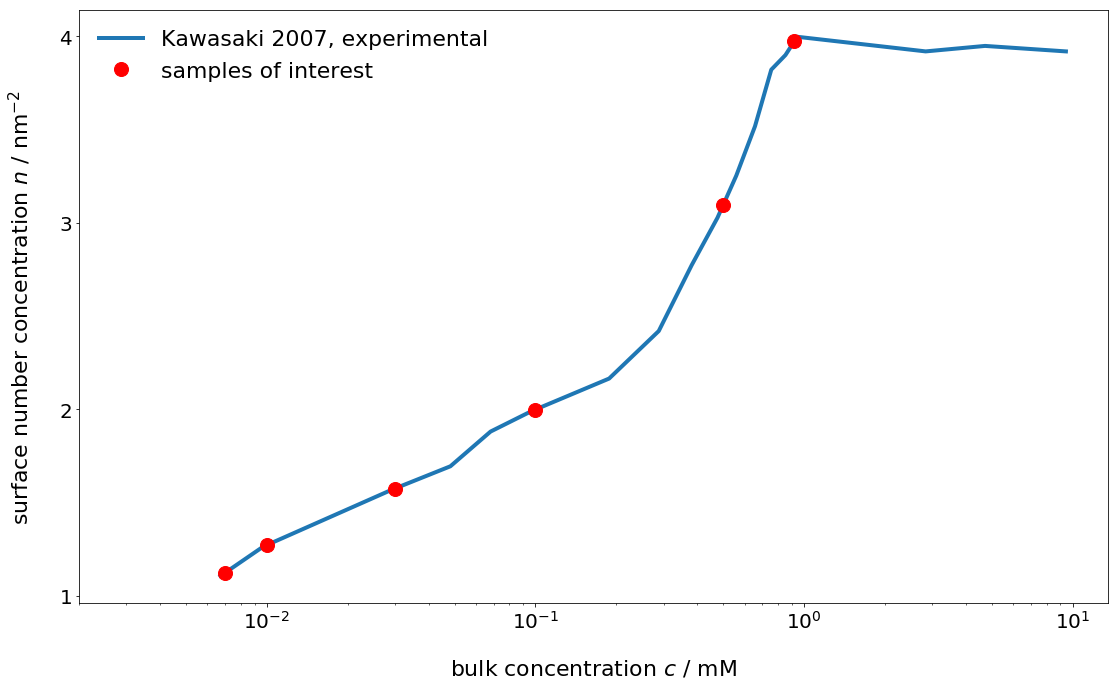

In [1013]:
rows = 1
cols = 1

fig = plt.figure(figsize=(16*cols, 10*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot( np.log10( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli ),
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "Kawasaki 2007, experimental", fig = fig, pos = p)
_, _ = addSubplot( np.log10( sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli ),
                    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
                    fmtstr='ro', fig = fig, pos = p, ax = ax,
                    legend = "samples of interest")
# _, _ = addSubplot(
#     np.log10( exp_sklt_unpublished_fig1_data[["c"]] / C.milli ),
#             exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
#             #title = "Surface number density of surfactant ions on Au (111), experimental", 
#             legend = "SDS, unpublished 2017", fig = fig, pos = p, ax = ax ) 
# _, _ = addSubplot( 
#     exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area(
#         sim_SDS_on_AU_111_molecular_surface_areas_of_interest )[2:],     
#     1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[2:] * C.nano**2,
#             fmtstr='ro', fig = fig, pos = p, ax = ax,
#             legend = "discrete subsets in focus")


ax.legend(frameon=False, loc='upper left')
ax.set_yticks(np.arange(1,5,dtype=int))
ax.set_xticks(wanted_minor_x_ticks, minor=True)
ax.set_xticks(wanted_major_x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels)
# ax.set_xscale("log")
ax.set_xlabel(r'bulk concentration $ c \ / \ \mathrm{mM}$', labelpad=BIGGER_SIZE)
ax.set_ylabel(r'surface number concentration $ n \ / \ {\mathrm{nm}^{-2}}$',labelpad=BIGGER_SIZE)
fig.tight_layout()


In [1016]:
fig.savefig('fig/20180927_concentrations_in_focus_ctab_only_600dpi.png', dpi=600)

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


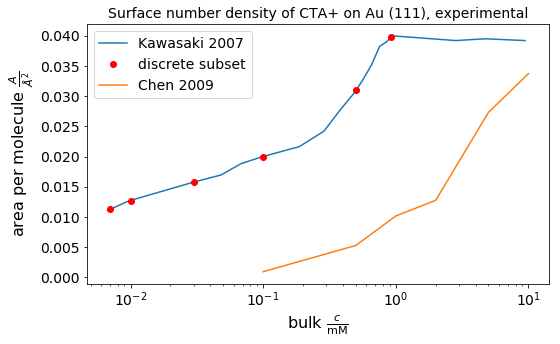

In [822]:
rows = 1
cols = 1

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
fig, ax = addSubplot(
                   exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.angstrom**2,
                   title = "Surface number density of CTA+ on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
# _, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
#                   fmtstr='ro', fig = fig, pos = p, ax = ax)


_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   1/exp_sklt_unpublished_fig1_data[["A"]] * C.angstrom**2,
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Chen 2009", fig = fig, ax = ax )

ax.plot(
    sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.angstrom**2,'ro',
    label = 'discrete subset'
    )

ax.legend()
ax.set_xscale("log")

# p = next(pos)
# _, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
#                   title = "Area perc CTA+ molecule on Au (111), experimental", 
#                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
#                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
#                   legend = "Kawasaki 2007", fig = fig, pos = p)
# _, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["A"]] /C.angstrom**2,
#                    fmtstr='ro', fig = fig, pos = p, ax = ax)
# ax.set_xscale("log")

fig.tight_layout()

## Simulation performance data

In [177]:
sim_performance_df = pd.DataFrame()

In [178]:
comment = """
Loop time of 29364.4 on 40 procs for 500000 steps with 48702 atoms
Performance: 2.942 ns/day, 8.157 hours/ns, 17.027 timesteps/s
82.5% CPU use with 40 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 10872      | 13539      | 15442      |1250.2 | 46.11
Bond    | 0.70151    | 1.4999     | 18.554     | 236.7 |  0.01
Kspace  | 3205.4     | 5114.2     | 7788.7     |2037.7 | 17.42
Neigh   | 1656.4     | 1658.7     | 1661.2     |   2.7 |  5.65
Comm    | 403.49     | 423.78     | 445.48     |  52.8 |  1.44
Output  | 6313.9     | 6314       | 6315       |   0.2 | 21.50
Modify  | 2000.8     | 2120.6     | 2184.7     |  77.2 |  7.22
Other   |            | 192.4      |            |       |  0.66

Nlocal:    1217.55 ave 1294 max 1061 min
Histogram: 1 2 3 4 4 1 2 1 10 12
Nghost:    12586.2 ave 13213 max 11674 min
Histogram: 6 10 0 0 0 0 0 0 5 19
Neighs:    713495 ave 797594 max 572392 min
Histogram: 2 3 3 5 2 1 1 5 8 10

Total # of neighbors = 28539789
Ave neighs/atom = 586.009
Ave special neighs/atom = 1.88768
Neighbor list builds = 57936
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:321)
  G vector (1/distance) = 0.277772
  grid = 72 72 120
  stencil order = 5
  estimated absolute RMS force accuracy = 0.000418848
  estimated relative force accuracy = 1.26132e-06
  using single precision FFTs
  3d grid and FFT values/proc = 33325 15552
Total wall time: 8:09:29
Done!

---
Ran with 'dump netcdf/mpiio', not 'netcdf'
"""

In [179]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":         500000, 
                              "time":               1e-9, # 1e-s9 = 1 ns
                              "natoms":         48702,
                              "machine":       "NEMO",
                              "nodes":              2,
                              "ppn":               20,
                              "cores":             40,
                              "mpi_tasks":         40,
                              "omp_threads":        1,
                              "walltime":       29364.4,
                              "ns_per_day":         2.942,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201807/1_CTAB_on_AU_21x12x2_netcdf/1_CTAB_on_111_AU_21x12x2_npt_production.o3537270",
                              "comment":        comment
                           }, ignore_index=True )

In [180]:
comment = """
Loop time of 39290.4 on 40 procs for 500000 steps with 48702 atoms

Performance: 2.199 ns/day, 10.914 hours/ns, 12.726 timesteps/s
115.8% CPU use with 20 MPI tasks x 2 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 20875      | 25230      | 29215      |1641.5 | 64.21
Bond    | 24.598     | 31.415     | 44.721     |  73.2 |  0.08
Kspace  | 6090.1     | 10075      | 14428      |2595.0 | 25.64
Neigh   | 2154.9     | 2156.5     | 2158.5     |   2.4 |  5.49
Comm    | 345.65     | 354.48     | 362.7      |  29.1 |  0.90
Output  | 662.01     | 662.16     | 663.15     |   0.9 |  1.69
Modify  | 750.69     | 758.5      | 766.27     |  16.0 |  1.93
Other   |            | 22.44      |            |       |  0.06

Nlocal:    2435.1 ave 2566 max 2201 min
Histogram: 1 2 1 4 0 0 0 0 6 6
Nghost:    15942.1 ave 16567 max 15055 min
Histogram: 6 2 0 0 0 0 0 0 1 11
Neighs:    1.37134e+06 ave 1.52821e+06 max 1.18507e+06 min
Histogram: 4 1 2 0 1 0 1 6 2 3

Total # of neighbors = 27426811
Ave neighs/atom = 563.156
Ave special neighs/atom = 1.88768
Neighbor list builds = 56527
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:321)
  G vector (1/distance) = 0.277106
  grid = 72 72 120
  stencil order = 5
  estimated absolute RMS force accuracy = 0.000434129
  estimated relative force accuracy = 1.30734e-06
  using single precision FFTs
  3d grid and FFT values/proc = 57319 31104
Last active /omp style is kspace_style pppm/omp
Total wall time: 10:54:52
Done!

---
Ran with 'dump netcdf', not 'netcdf/mpiio'
"""

In [181]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":         500000, 
                              "time":               1e-9, # 1e-s9 = 1 ns
                              "natoms":         48702,
                              "machine":       "NEMO",
                              "nodes":              2,
                              "ppn":               20,
                              "cores":             40,
                              "mpi_tasks":         20,
                              "omp_threads":        2,
                              "walltime":       39290.4,
                              "ns_per_day":         2.199,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201807/1_CTAB_on_AU_21x12x2_netcdf/1_CTAB_on_111_AU_21x12x2_nve_production.o3537271",
                              "comment":        comment
                           }, ignore_index=True )

In [182]:
sim_performance_df

,build,code,comment,cores,identifier,machine,mpi_tasks,natoms,nodes,ns_per_day,omp_threads,ppn,steps,time,walltime
0,lammps/16Mar18-gnu-5.2-openmpi-2.1,LAMMPS,\nLoop time of 29364.4 on 40 procs for 500000 ...,40.0,fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws...,NEMO,40.0,48702.0,2.0,2.942,1.0,20.0,500000.0,1.000000e-09,29364.4
1,lammps/16Mar18-gnu-5.2-openmpi-2.1,LAMMPS,\nLoop time of 39290.4 on 40 procs for 500000 ...,40.0,fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws...,NEMO,20.0,48702.0,2.0,2.199,2.0,20.0,500000.0,1.000000e-09,39290.4


### 1-Node comparison of mpiiio

In [180]:
comment = """
Loop time of 1011.99 on 20 procs for 10000 steps with 61626 atoms

Performance: 1.708 ns/day, 14.055 hours/ns, 9.881 timesteps/s
73.5% CPU use with 20 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 334.18     | 414.03     | 456.68     | 191.4 | 40.91
Bond    | 0.009931   | 0.66405    | 3.4661     | 121.1 |  0.07
Kspace  | 125.09     | 166.56     | 243.67     | 293.5 | 16.46
Neigh   | 66.071     | 66.142     | 66.225     |   0.6 |  6.54
Comm    | 9.2086     | 9.8781     | 11.057     |  17.8 |  0.98
Output  | 334.03     | 334.04     | 334.05     |   0.0 | 33.01
Modify  | 17.381     | 18.26      | 18.592     |  10.1 |  1.80
Other   |            | 2.42       |            |       |  0.24

Nlocal:    3081.3 ave 3283 max 2715 min
Histogram: 1 3 0 0 0 1 2 5 6 2
Nghost:    17150.2 ave 18019 max 15922 min
Histogram: 4 2 2 0 0 0 0 3 1 8
Neighs:    1.67933e+06 ave 1.87362e+06 max 1.37088e+06 min
Histogram: 2 2 0 0 0 5 0 4 5 2

Total # of neighbors = 33586660
Ave neighs/atom = 545.008
Ave special neighs/atom = 2.28641
Neighbor list builds = 1108
Dangerous builds = 0

---
Ran with 'netcdf/mpiio'
"""

In [183]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":          10000, 
                              "time":              20e-12, # 1e-12s = 1 ps
                              "natoms":         61626,
                              "machine":       "NEMO",
                              "nodes":              1,
                              "ppn":               20,
                              "cores":             20,
                              "mpi_tasks":         20,
                              "omp_threads":        1,
                              "walltime":        1011.99,
                              "ns_per_day":         1.708,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201808/41_CTAB_on_AU_111_21x12x2_bilayer/nvtEqulibration",
                              "comment":        comment
                           }, ignore_index=True )

In [184]:
comment = """
Loop time of 681.105 on 20 procs for 10000 steps with 61626 atoms

Performance: 2.537 ns/day, 9.460 hours/ns, 14.682 timesteps/s
96.0% CPU use with 20 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 331.4      | 407.92     | 446.41     | 183.1 | 59.89
Bond    | 0.0095883  | 0.6574     | 3.3118     | 119.2 |  0.10
Kspace  | 121.42     | 158.7      | 233.72     | 285.6 | 23.30
Neigh   | 64.403     | 64.459     | 64.55      |   0.6 |  9.46
Comm    | 9.0607     | 9.6352     | 10.594     |  15.2 |  1.41
Output  | 18.631     | 18.637     | 18.651     |   0.2 |  2.74
Modify  | 18.935     | 19.116     | 19.416     |   3.7 |  2.81
Other   |            | 1.984      |            |       |  0.29

Nlocal:    3081.3 ave 3250 max 2737 min
Histogram: 3 1 0 0 0 0 3 3 6 4
Nghost:    17142.3 ave 18014 max 15856 min
Histogram: 4 0 4 0 0 0 0 3 1 8
Neighs:    1.67925e+06 ave 1.84573e+06 max 1.38442e+06 min
Histogram: 2 1 1 0 1 3 0 2 6 4

Total # of neighbors = 33585016
Ave neighs/atom = 544.981
Ave special neighs/atom = 2.28641
Neighbor list builds = 1110
Dangerous builds = 0

---
Ran with 'netcdf', substrate COM fixed
"""

In [185]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":          10000, 
                              "time":              20e-12, # 1e-12s = 1 ps
                              "natoms":         61626,
                              "machine":       "NEMO",
                              "nodes":              1,
                              "ppn":               20,
                              "cores":             20,
                              "mpi_tasks":         20,
                              "omp_threads":        1,
                              "walltime":         681.105,
                              "ns_per_day":         2.537,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201808/41_CTAB_on_AU_111_21x12x2_bilayer/nvtEqulibrationNetCDF",
                              "comment":        comment
                           }, ignore_index=True )

In [186]:
comment = """
Loop time of 581.453 on 20 procs for 10000 steps with 61626 atoms

Performance: 2.972 ns/day, 8.076 hours/ns, 17.198 timesteps/s
98.8% CPU use with 20 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 337.88     | 410.05     | 447.5      | 183.1 | 70.52
Bond    | 0.009271   | 0.66845    | 3.6133     | 122.6 |  0.11
Kspace  | 33.354     | 69.869     | 140.6      | 433.6 | 12.02
Neigh   | 65.539     | 65.598     | 65.698     |   0.6 | 11.28
Comm    | 8.0816     | 8.8095     | 9.7414     |  14.6 |  1.52
Output  | 5.8401     | 5.845      | 5.8589     |   0.3 |  1.01
Modify  | 18.727     | 18.811     | 18.926     |   1.4 |  3.24
Other   |            | 1.8        |            |       |  0.31

---
Ran with 'netcdf', substrate COM fixed, ppme 1e-4 accuracy
"""

In [187]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":          10000, 
                              "time":              20e-12, # 1e-12s = 1 ps
                              "natoms":         61626,
                              "machine":       "NEMO",
                              "nodes":              1,
                              "ppn":               20,
                              "cores":             20,
                              "mpi_tasks":         20,
                              "omp_threads":        1,
                              "walltime":         581.453,
                              "ns_per_day":         2.972,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201808/41_CTAB_on_AU_111_21x12x2_bilayer/nvtEqulibrationNetCDF,PPME_1e-4",
                              "comment":        comment
                           }, ignore_index=True )

In [ ]:
comment="""
Loop time of 698.119 on 20 procs for 10000 steps with 61626 atoms

Performance: 2.475 ns/day, 9.696 hours/ns, 14.324 timesteps/s
98.1% CPU use with 20 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 348.5      | 417.71     | 452.62     | 164.2 | 59.83
Bond    | 0.014174   | 0.79209    | 4.0102     | 130.9 |  0.11
Kspace  | 31.071     | 65.339     | 134.2      | 410.6 |  9.36
Neigh   | 58.35      | 58.418     | 58.498     |   0.6 |  8.37
Comm    | 8.0709     | 8.4643     | 8.7847     |   7.5 |  1.21
Output  | 121.14     | 121.14     | 121.14     |   0.0 | 17.35
Modify  | 24.727     | 24.799     | 25.007     |   2.0 |  3.55
Other   |            | 1.455      |            |       |  0.21

Nlocal:    3081.3 ave 3258 max 2796 min
Histogram: 4 0 0 0 0 0 4 7 4 1
Nghost:    17384 ave 18049 max 16527 min
Histogram: 8 0 0 0 0 0 0 2 2 8
Neighs:    1.70431e+06 ave 1.86406e+06 max 1.50948e+06 min
Histogram: 4 0 0 2 2 1 2 4 4 1

---
Ran with 'netcdf', substrate COM fixed, ppme 1e-4 accuracy
"""

In [188]:
sim_performance_df = sim_performance_df.append( {  "code" : "LAMMPS",
                              "build": "lammps/16Mar18-gnu-5.2-openmpi-2.1",
                              "steps":          10000, 
                              "time":              20e-12, # 1e-12s = 1 ps
                              "natoms":         61626,
                              "machine":       "NEMO",
                              "nodes":              1,
                              "ppn":               20,
                              "cores":             20,
                              "mpi_tasks":         20,
                              "omp_threads":        1,
                              "walltime":         698.119,
                              "ns_per_day":         2.475,
                              "identifier": "fr_jh1130@login1.nemo.uni-freiburg.de:/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/ctab/201808/41_CTAB_on_AU_111_21x12x2_bilayer/41_CTAB_on_AU_111_21x12x2_bilayer_03_nptEquilibration.log",
                              "comment":        comment
                           }, ignore_index=True )

# Sanbox

In [570]:
C.centi

0.01

In [572]:
C.N_A

6.022140857e+23

In [580]:
C.angstrom

1e-10

In [581]:
150**2 * C.angstrom**2 # m^2

2.25e-16

In [587]:
C.centi

0.01

In [591]:
4e-10 / C.centi**2 * C.N_A # moles / m^2 */ moles

2.4088563428e+18

In [593]:
4e-10 / C.centi**2 * C.N_A * 150**2 * C.angstrom**2# moles / m^2 */ moles * m^2

541.9926771300001

In [592]:
150**2 * C.angstrom**2

2.25e-16

In [398]:
sim_SDS_on_AU_111_df.columns

Index(['box', 'ci_initial_placement', 'counterion', 'pbc', 'pressure',
       'sb_crystal_plane', 'sb_multiples', 'sb_unit_cell', 'sf_preassembly',
       'solvent', 'substrate', 'surfactant', 'sv_density', 'sv_preassembly',
       'temperature', 'sb_area_per_sf_molecule', 'sb_measures', 'sb_normal',
       'sb_volume', 'sb_thickness', 'sb_area', 'sf_concentration',
       'sb_circular_area_per_sf_molecule_radius',
       'sb_square_area_per_sf_molecule_side', 'sf_nmolecules', 'sb_name',
       'system_name'],
      dtype='object')

In [399]:
sim_SDS_on_AU_111_df["counterion"]

0     NA
1     NA
2     NA
3     NA
4     NA
5     NA
6     NA
7     NA
8     NA
9     NA
10    NA
11    NA
12    NA
13    NA
14    NA
15    NA
16    NA
17    NA
18    NA
19    NA
20    NA
21    NA
22    NA
23    NA
24    NA
25    NA
26    NA
27    NA
28    NA
29    NA
30    NA
31    NA
32    NA
33    NA
34    NA
35    NA
36    NA
37    NA
38    NA
39    NA
40    NA
41    NA
42    NA
43    NA
44    NA
45    NA
46    NA
47    NA
Name: counterion, dtype: object

## Git commands

In [174]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   surfactant_systems.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [175]:
!git add .

In [176]:
!git commit -m "Added prearranged counterions"

[master 4a8a9bb] Added prearranged counterions
 1 file changed, 4458 insertions(+), 709 deletions(-)


In [ ]:
# one or more keyword value pairs may be appended
# keyword = iso or aniso or x or y or z or couple or dilate or modulus
#   iso or aniso values = Pstart Pstop Pdamp
#     Pstart,Pstop = scalar external pressure at start/end of run (pressure units)
#     Pdamp = pressure damping parameter (time units)
#   x or y or z values = Pstart Pstop Pdamp
#     Pstart,Pstop = external stress tensor component at start/end of run (pressure units)
#     Pdamp = stress damping parameter (time units)
#   couple = none or xyz or xy or yz or xz
#   modulus value = bulk modulus of system (pressure units)
#   dilate value = all or partial